## Predictive Modeling, Classification and Analysis of COVID-19 deaths over Excess deaths using Machine Learning Algorithms.

__________

# Introduction to Covid-19 excess deaths Data from Economist
    
    As COVID-19 has spread around the world, people have become seriously familiar with the death tolls that their governments publish each day. Unfortunately, these tend to under-count the true number of fatalities that the disease has already caused. In many places, official daily figures exclude anybody who did not die in hospital or who did not test positive. Often the cause of death takes several days to establish and report, which creates a lag in the data. And even the most complete covid-19 records will not count people who were killed by conditions that might normally have been treated, had hospitals not been overwhelmed by a surge of patients needing intensive care.
    
    A better way to measure the damage caused by such a medical crisis is to look at “excess mortality”: the gap between the total number of people who died from any cause, and the historical average for the same place and time of year.
    
    From EuroMOMO, a network of epidemiologists who collected weekly reports on deaths from all causes in 24 European countries, covering 350m people.
    
    

    This tracker, developed by The Economist, calculates excess deaths due to COVID-19 by looking at recent weekly or monthly death totals and comparing them to an expected number of deaths. The expected number of deaths are calculated from historical death totals for that time period. 
    
   Source: https://github.com/TheEconomist/covid-19-excess-deaths-tracker

### Loading Useful librabries

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading .csv files

In [3]:
list_of_countries = []
list_of_files = []
for each in os.listdir():
    if each.endswith(".csv"):
        temp = each.split('_')
        list_of_countries.append(temp[0])
        list_of_files.append(each)
        
print (list_of_countries) 
print (list_of_files)
print (len(list_of_countries))
print (len(list_of_files))
list_of_countries[-1] = 'united_states'
print (list_of_countries)  

['britain', 'chile', 'denmark', 'france', 'germany', 'italy', 'netherlands', 'spain', 'switzerland', 'united states']
['britain_excess_deaths.csv', 'chile_excess_deaths.csv', 'denmark_excess_deaths.csv', 'france_excess_deaths.csv', 'germany_excess_deaths.csv', 'italy_excess_deaths.csv', 'netherlands_excess_deaths.csv', 'spain_excess_deaths.csv', 'switzerland_excess_deaths.csv', 'united states_excess_deaths.csv']
10
10
['britain', 'chile', 'denmark', 'france', 'germany', 'italy', 'netherlands', 'spain', 'switzerland', 'united_states']


### Reading loaded files

In [4]:
dict_data = {}
for each, one in zip(list_of_files, list_of_countries):
    dict_data[one] = pd.read_csv(each)

britain = dict_data['britain']
chile = dict_data['chile']
denmark = dict_data['denmark']
france = dict_data['france']
germany = dict_data['germany']
italy = dict_data['italy']
netherlands = dict_data['netherlands']
spain = dict_data['spain']
switzerland = dict_data['switzerland']
united_states = dict_data['united_states']



In [5]:
united_states.head()

country   region region_code  start_date    end_date  year  week  \
0  United States  Alabama          AL  2019-12-29  2020-01-04  2020     1   
1  United States  Alabama          AL  2020-01-05  2020-01-11  2020     2   
2  United States  Alabama          AL  2020-01-12  2020-01-18  2020     3   
3  United States  Alabama          AL  2020-01-19  2020-01-25  2020     4   
4  United States  Alabama          AL  2020-01-26  2020-02-01  2020     5   

   population  total_deaths  covid_deaths  expected_deaths  excess_deaths  \
0     4903185          1093             0           1139.4          -46.4   
1     4903185          1148             0           1163.6          -15.6   
2     4903185          1073             0           1130.4          -57.4   
3     4903185          1082             0           1117.6          -35.6   
4     4903185          1052             0           1117.6          -65.6   

   non_covid_deaths  
0              1093  
1              1148  
2              1073  
3              1082  
4              1052

In [6]:
united_states.tail()

country    region region_code  start_date    end_date  year  week  \
1183  United States  New York          NY  2020-05-03  2020-05-09  2020    19   
1184  United States  New York          NY  2020-05-10  2020-05-16  2020    20   
1185  United States  New York          NY  2020-05-17  2020-05-23  2020    21   
1186  United States  New York          NY  2020-05-24  2020-05-30  2020    22   
1187  United States  New York          NY  2020-05-31  2020-06-06  2020    23   

      population  total_deaths  covid_deaths  expected_deaths  excess_deaths  \
1183    19453561          4842          2737           2825.8         2016.2   
1184    19453561          4087          1246           2841.2         1245.8   
1185    19453561          3512           920           2897.4          614.6   
1186    19453561          3198           671           2733.2          464.8   
1187    19453561          2908           550           2790.0          118.0   

      non_covid_deaths  
1183              2105  
1184              2841  
1185              2592  
1186              2527  
1187              2358

### Printing Sample data of all countries

In [7]:
for one in dict_data:
    print ("================================= " + one + "================================= ")
    print (dict_data[one].head())
    print (dict_data[one].shape)
    print (dict_data[one].info())
    print()


================================= britain================================= 
   country             region region_code  start_date    end_date  year  week  \
0  Britain  England and Wales   K04000001  2020-01-04  2020-01-10  2020     1   
1  Britain  England and Wales   K04000001  2020-01-11  2020-01-17  2020     2   
2  Britain  England and Wales   K04000001  2020-01-18  2020-01-24  2020     3   
3  Britain  England and Wales   K04000001  2020-01-25  2020-01-31  2020     4   
4  Britain  England and Wales   K04000001  2020-02-01  2020-02-07  2020     5   

   population  total_deaths  covid_deaths  expected_deaths  excess_deaths  \
0    59115809         14058             0          14131.2          -73.2   
1    59115809         12990             0          13218.6         -228.6   
2    59115809         11856             0          12791.8         -935.8   
3    59115809         11612             0          12256.8         -644.8   
4    59115809         10986             0          1

In [8]:
united_states.loc[united_states['total_deaths'] > 12000]

country    region region_code  start_date    end_date  year  week  \
1179  United States  New York          NY  2020-04-05  2020-04-11  2020    15   

      population  total_deaths  covid_deaths  expected_deaths  excess_deaths  \
1179    19453561         12329          6588           3079.0         9250.0   

      non_covid_deaths  
1179              5741

### Total Deaths histogram by Country from 2020 January : Plot

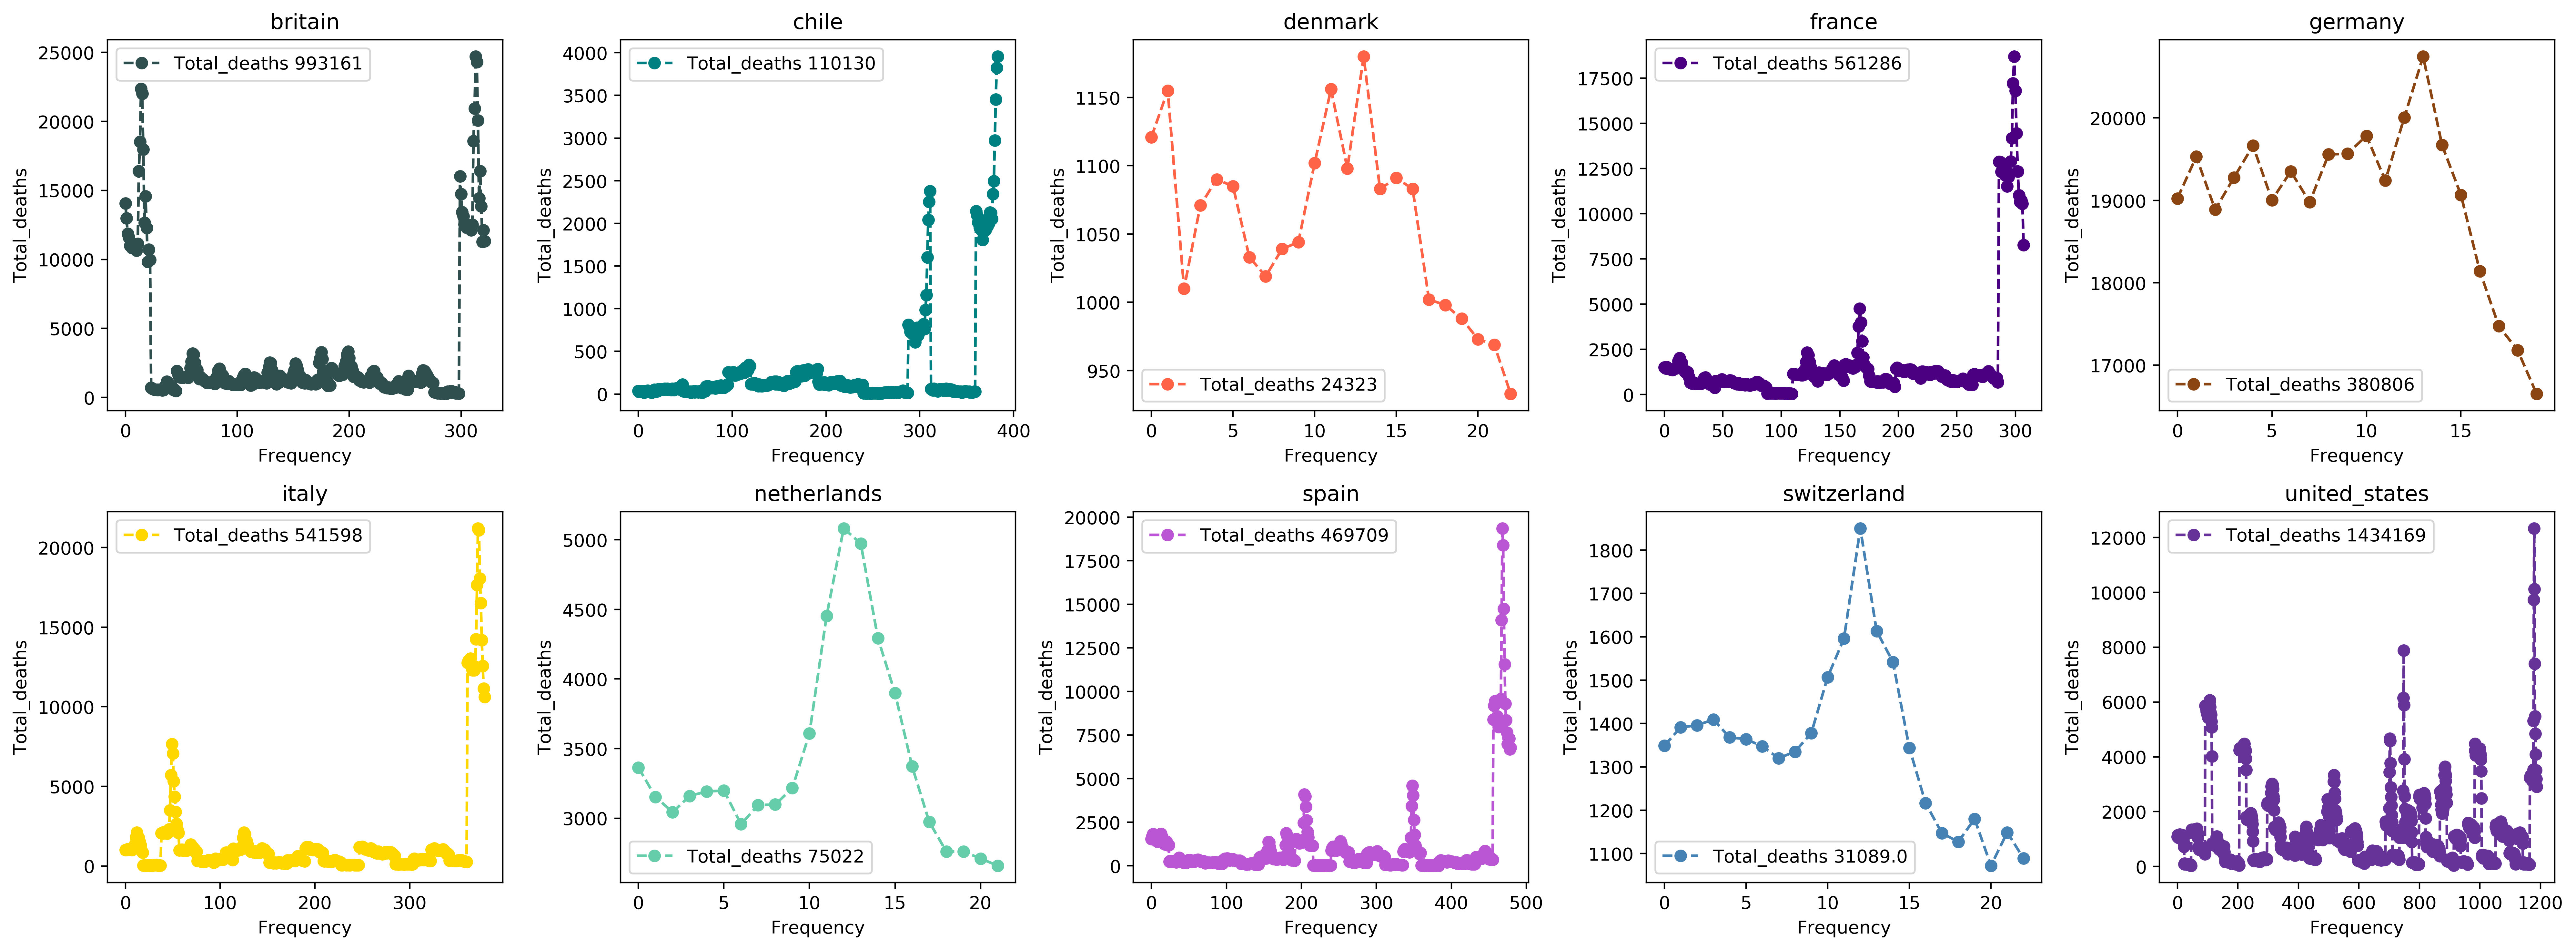

In [9]:
figure = plt.figure(figsize = (20,18), dpi = 400)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 
          'mediumaquamarine', 'mediumorchid', 'steelblue', 'rebeccapurple']
x = 1
for each in dict_data:
    plots = figure.add_subplot(5,5,x)
    plots.plot(dict_data[each]['total_deaths'], color = colors[x-1], 
               label = "Total_deaths " + str(dict_data[each]['total_deaths'].sum()), linestyle = 'dashed', marker = 'o' )
    plots.set_xlabel("Frequency")
    plots.set_ylabel("Total_deaths")
    plots.set_title(each)
    x = x + 1;
    plt.legend()


figure.tight_layout()


In [10]:
total_deaths_by_country = []
sums = []
for each in dict_data:
    total_deaths_by_country.append(each + " : " +str(dict_data[each]['total_deaths'].sum()))
    sums.append(dict_data[each]['total_deaths'].sum())
print (total_deaths_by_country)
print (pd.Series(sums).max())

['britain : 993161', 'chile : 110130', 'denmark : 24323', 'france : 561286', 'germany : 380806', 'italy : 541598', 'netherlands : 75022', 'spain : 469709', 'switzerland : 31089.0', 'united_states : 1434169']
1434169.0


### Non-Covid Deaths histogram by Country from 2020 January : Plot


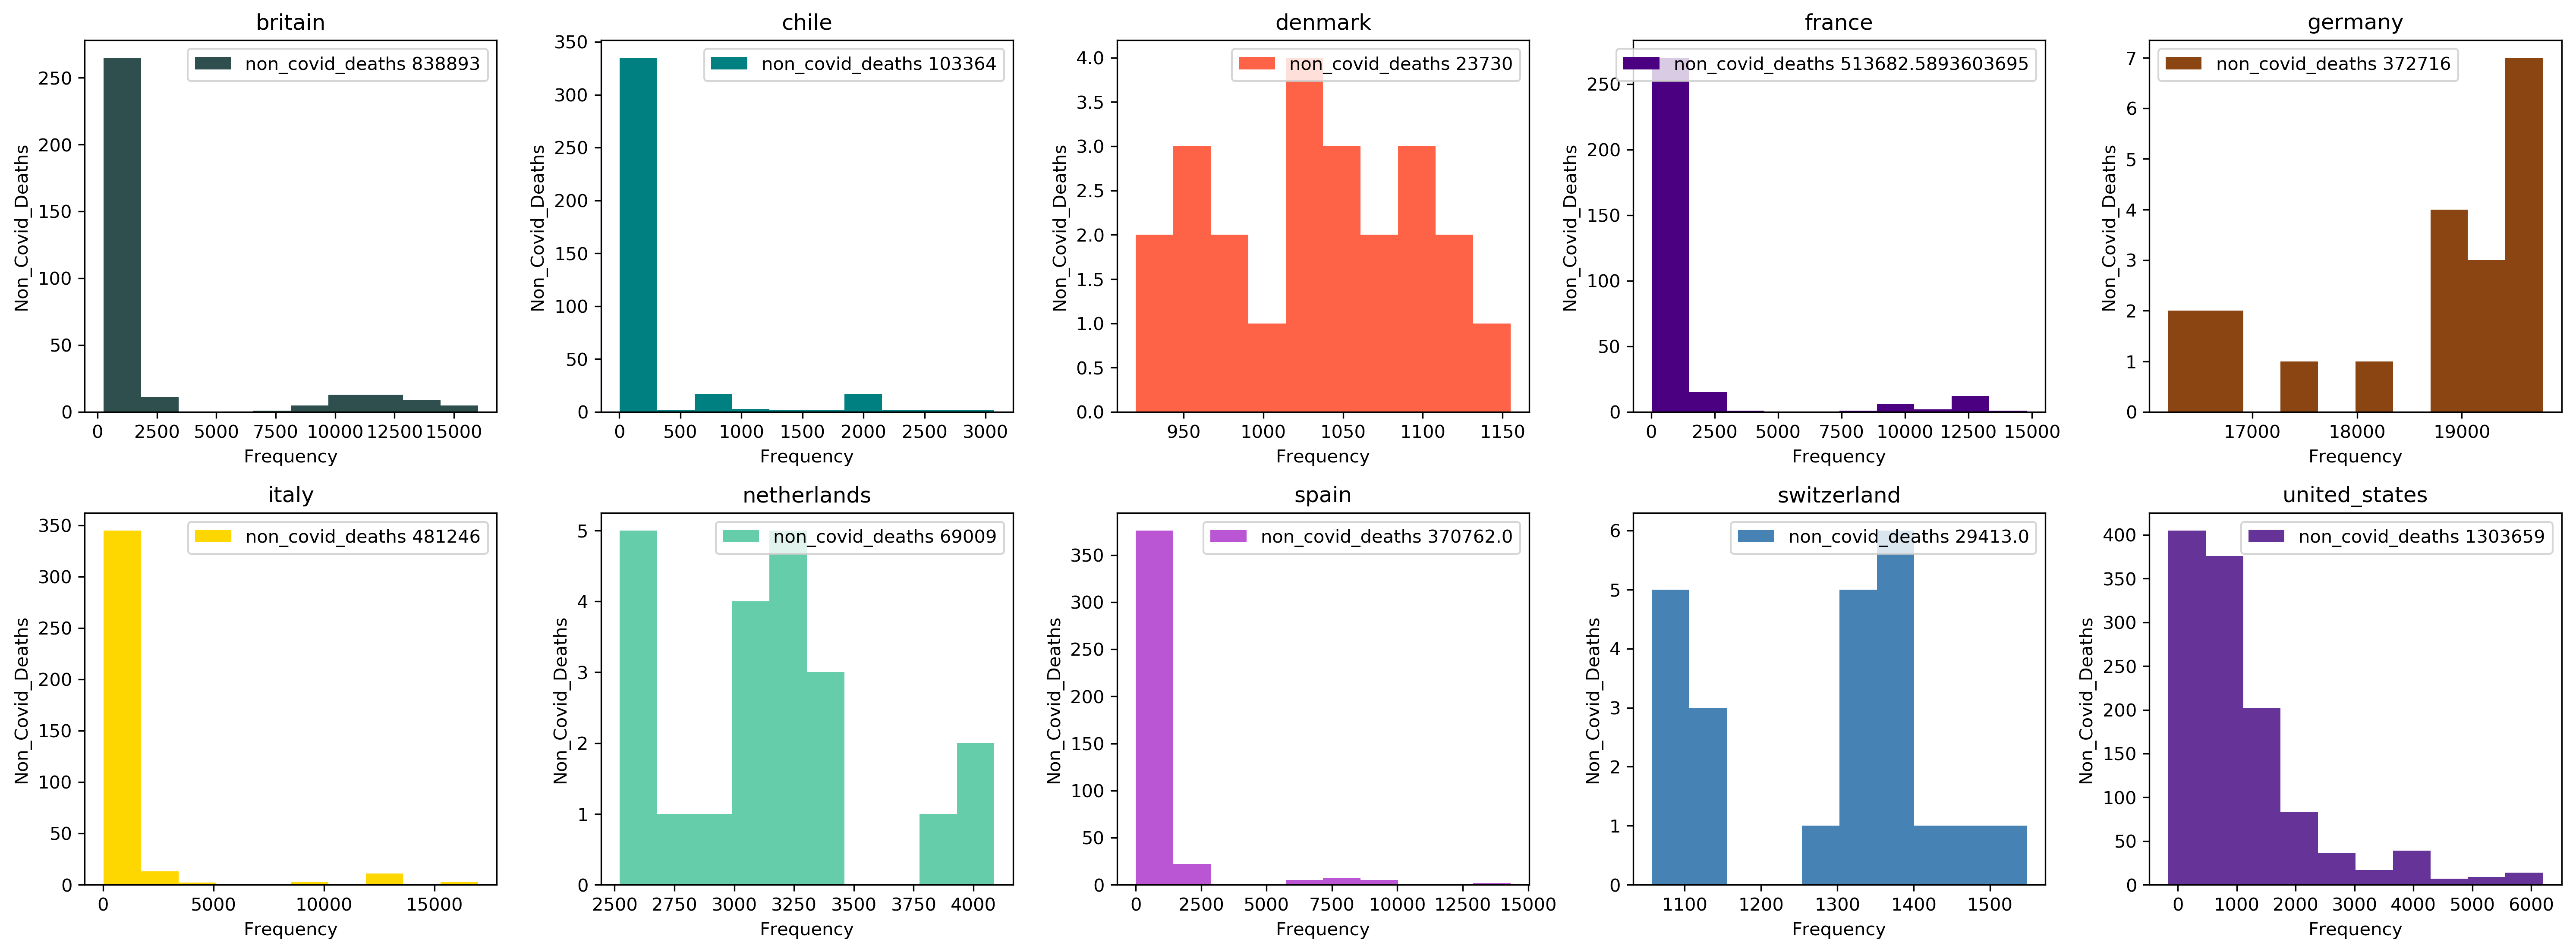

In [11]:
figure = plt.figure(figsize = (20,18), dpi = 300)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 
          'mediumaquamarine', 'mediumorchid', 'steelblue', 'rebeccapurple']
x = 1
for each in dict_data:
    plots = figure.add_subplot(5,5,x)
    plots.hist(dict_data[each]['non_covid_deaths'], color = colors[x-1], 
               label = "non_covid_deaths " + str(dict_data[each]['non_covid_deaths'].sum()) )
    plots.set_xlabel("Frequency")
    plots.set_ylabel("Non_Covid_Deaths")
    plots.set_title(each)
    x = x + 1;
    plt.legend()


figure.tight_layout()


In [12]:
non_covid_deaths_by_country = []
sums = []
for each in dict_data:
    non_covid_deaths_by_country.append(each + " : " +str(dict_data[each]['non_covid_deaths'].sum()))
    sums.append(dict_data[each]['non_covid_deaths'].sum())
print (non_covid_deaths_by_country)
print (pd.Series(sums).max())

['britain : 838893', 'chile : 103364', 'denmark : 23730', 'france : 513682.5893603695', 'germany : 372716', 'italy : 481246', 'netherlands : 69009', 'spain : 370762.0', 'switzerland : 29413.0', 'united_states : 1303659']
1303659.0


### Excess Deaths histogram by Country from 2020 January : Plot


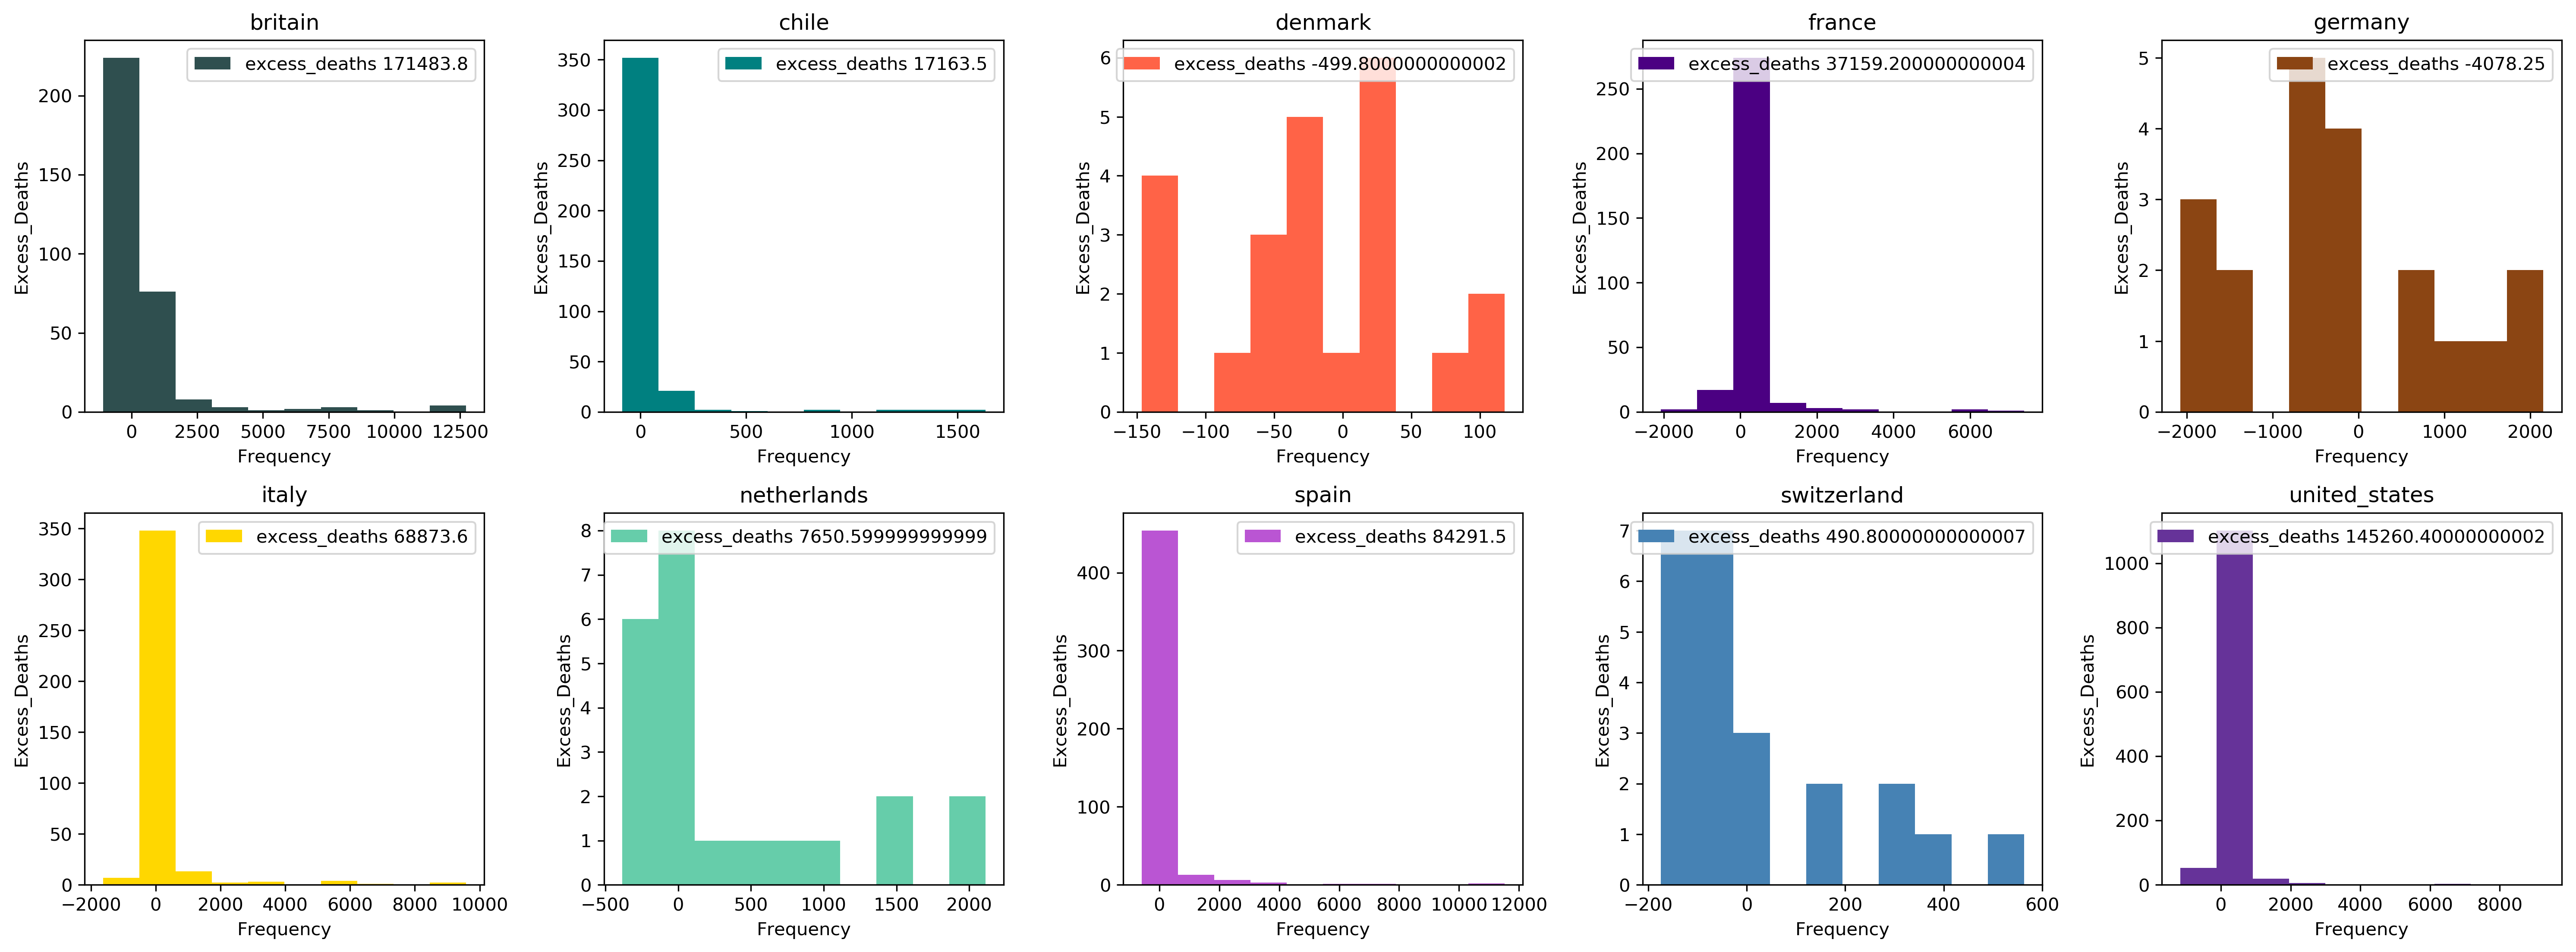

In [13]:
figure = plt.figure(figsize = (20,18), dpi = 300)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 
          'mediumaquamarine', 'mediumorchid', 'steelblue', 'rebeccapurple']
x = 1
for each in dict_data:
    plots = figure.add_subplot(5,5,x)
    plots.hist(dict_data[each]['excess_deaths'], color = colors[x-1], bins = 10, 
               label = "excess_deaths " + str(dict_data[each]['excess_deaths'].sum()) )
    plots.set_xlabel("Frequency")
    plots.set_ylabel("Excess_Deaths")
    plots.set_title(each)
    x = x + 1;
    plt.legend()


figure.tight_layout()


In [14]:
excess_deaths_by_country = []
sums = []
for each in dict_data:
    excess_deaths_by_country.append(each + " : " +str(dict_data[each]['excess_deaths'].sum()))
    sums.append(dict_data[each]['excess_deaths'].sum())
print (excess_deaths_by_country)
print (pd.Series(sums).max())

['britain : 171483.8', 'chile : 17163.5', 'denmark : -499.8000000000002', 'france : 37159.200000000004', 'germany : -4078.25', 'italy : 68873.6', 'netherlands : 7650.599999999999', 'spain : 84291.5', 'switzerland : 490.80000000000007', 'united_states : 145260.40000000002']
171483.8


### COVID-19 Deaths histogram by Country from 2020 January : Plot


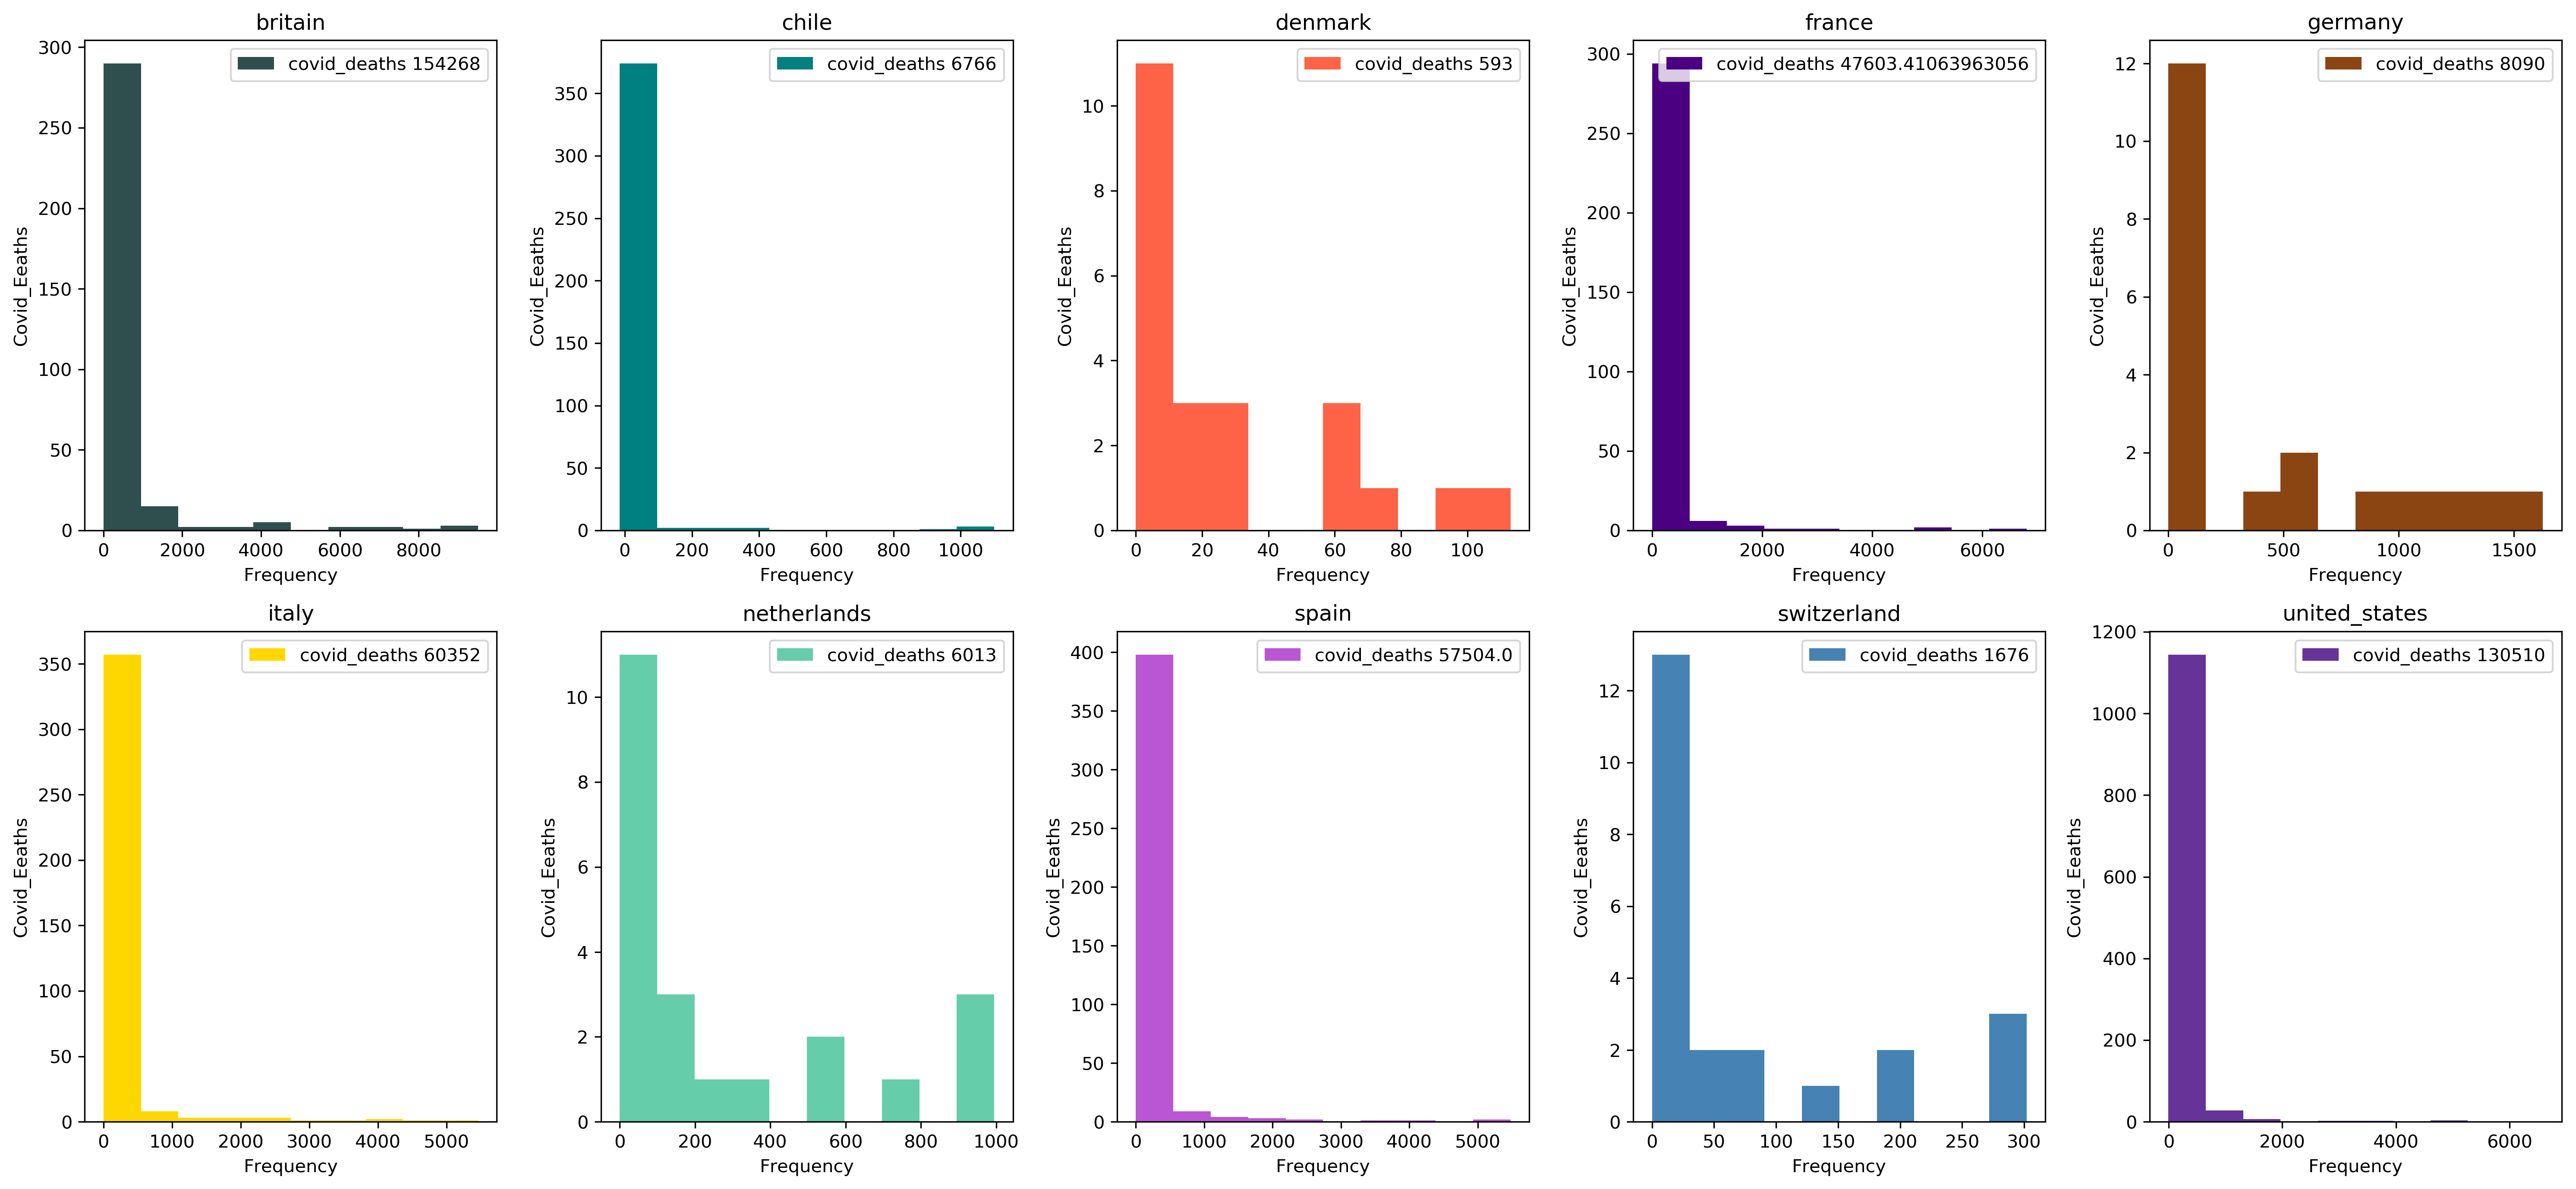

In [15]:
figure = plt.figure(figsize = (20,18), dpi = 300)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 'mediumaquamarine', 
          'mediumorchid', 'steelblue', 'rebeccapurple']
x = 1
for each in dict_data:
    plots = figure.add_subplot(4,5,x)
    plots.hist(dict_data[each]['covid_deaths'], color = colors[x-1], bins = 10, 
               label = "covid_deaths " + str(dict_data[each]['covid_deaths'].sum()) )
    plots.set_xlabel("Frequency")
    plots.set_ylabel("Covid_Eeaths")
    plots.set_title(each)
    x = x + 1;
    plt.legend()


figure.tight_layout()


In [16]:
covid_deaths_by_country = []
sums = []
for each in dict_data:
    covid_deaths_by_country.append(each + " : " +str(dict_data[each]['covid_deaths'].sum()))
    sums.append(dict_data[each]['covid_deaths'].sum())
print (covid_deaths_by_country)
print (pd.Series(sums).max())

['britain : 154268', 'chile : 6766', 'denmark : 593', 'france : 47603.41063963056', 'germany : 8090', 'italy : 60352', 'netherlands : 6013', 'spain : 57504.0', 'switzerland : 1676', 'united_states : 130510']
154268.0


### Does Covid deaths increased due to increase in Excess deaths?

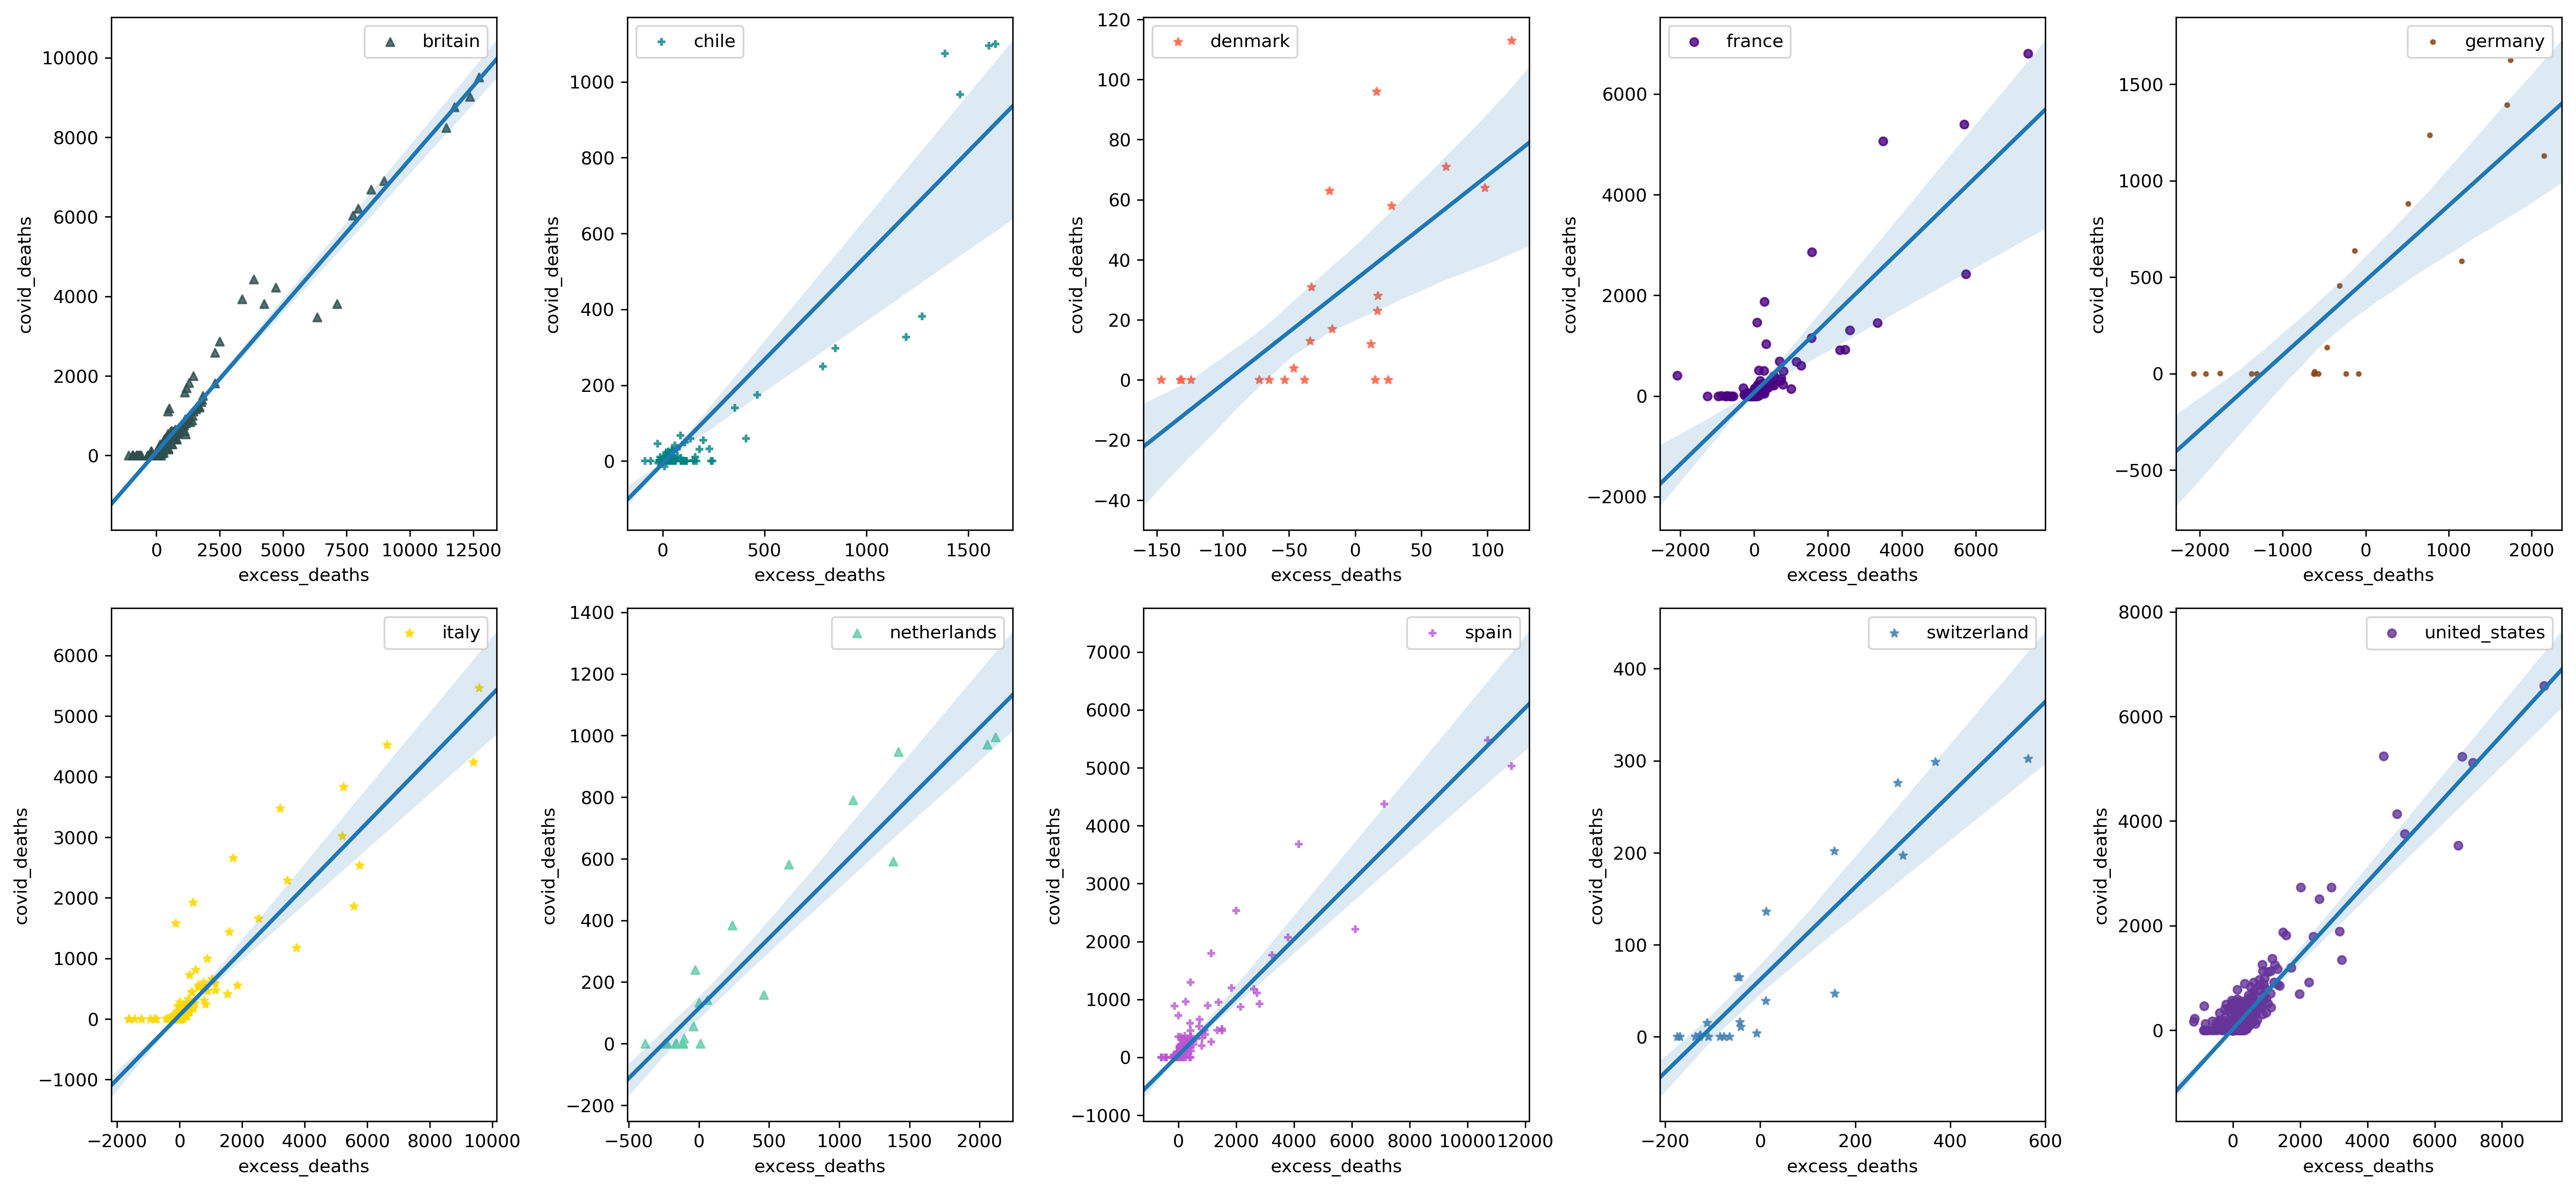

In [17]:
figure = plt.figure(figsize = (20,18), dpi = 300)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 'mediumaquamarine', 
          'mediumorchid', 'steelblue', 'rebeccapurple']
markers = ['^', '+', '*', 'o', '.', '*','^', '+', '*', 'o']
x = 1
for each in dict_data:
    plots = figure.add_subplot(4,5,x)
    plots = sns.regplot(dict_data[each]['excess_deaths'], dict_data[each]['covid_deaths'], 
                        scatter_kws={"color": colors[x-1], 's':20}, marker = markers[x-1], fit_reg = True, label = each)
    x = x + 1;
    plt.legend()

figure.tight_layout()    

### Does Covid deaths increased due to increase in Total deaths?


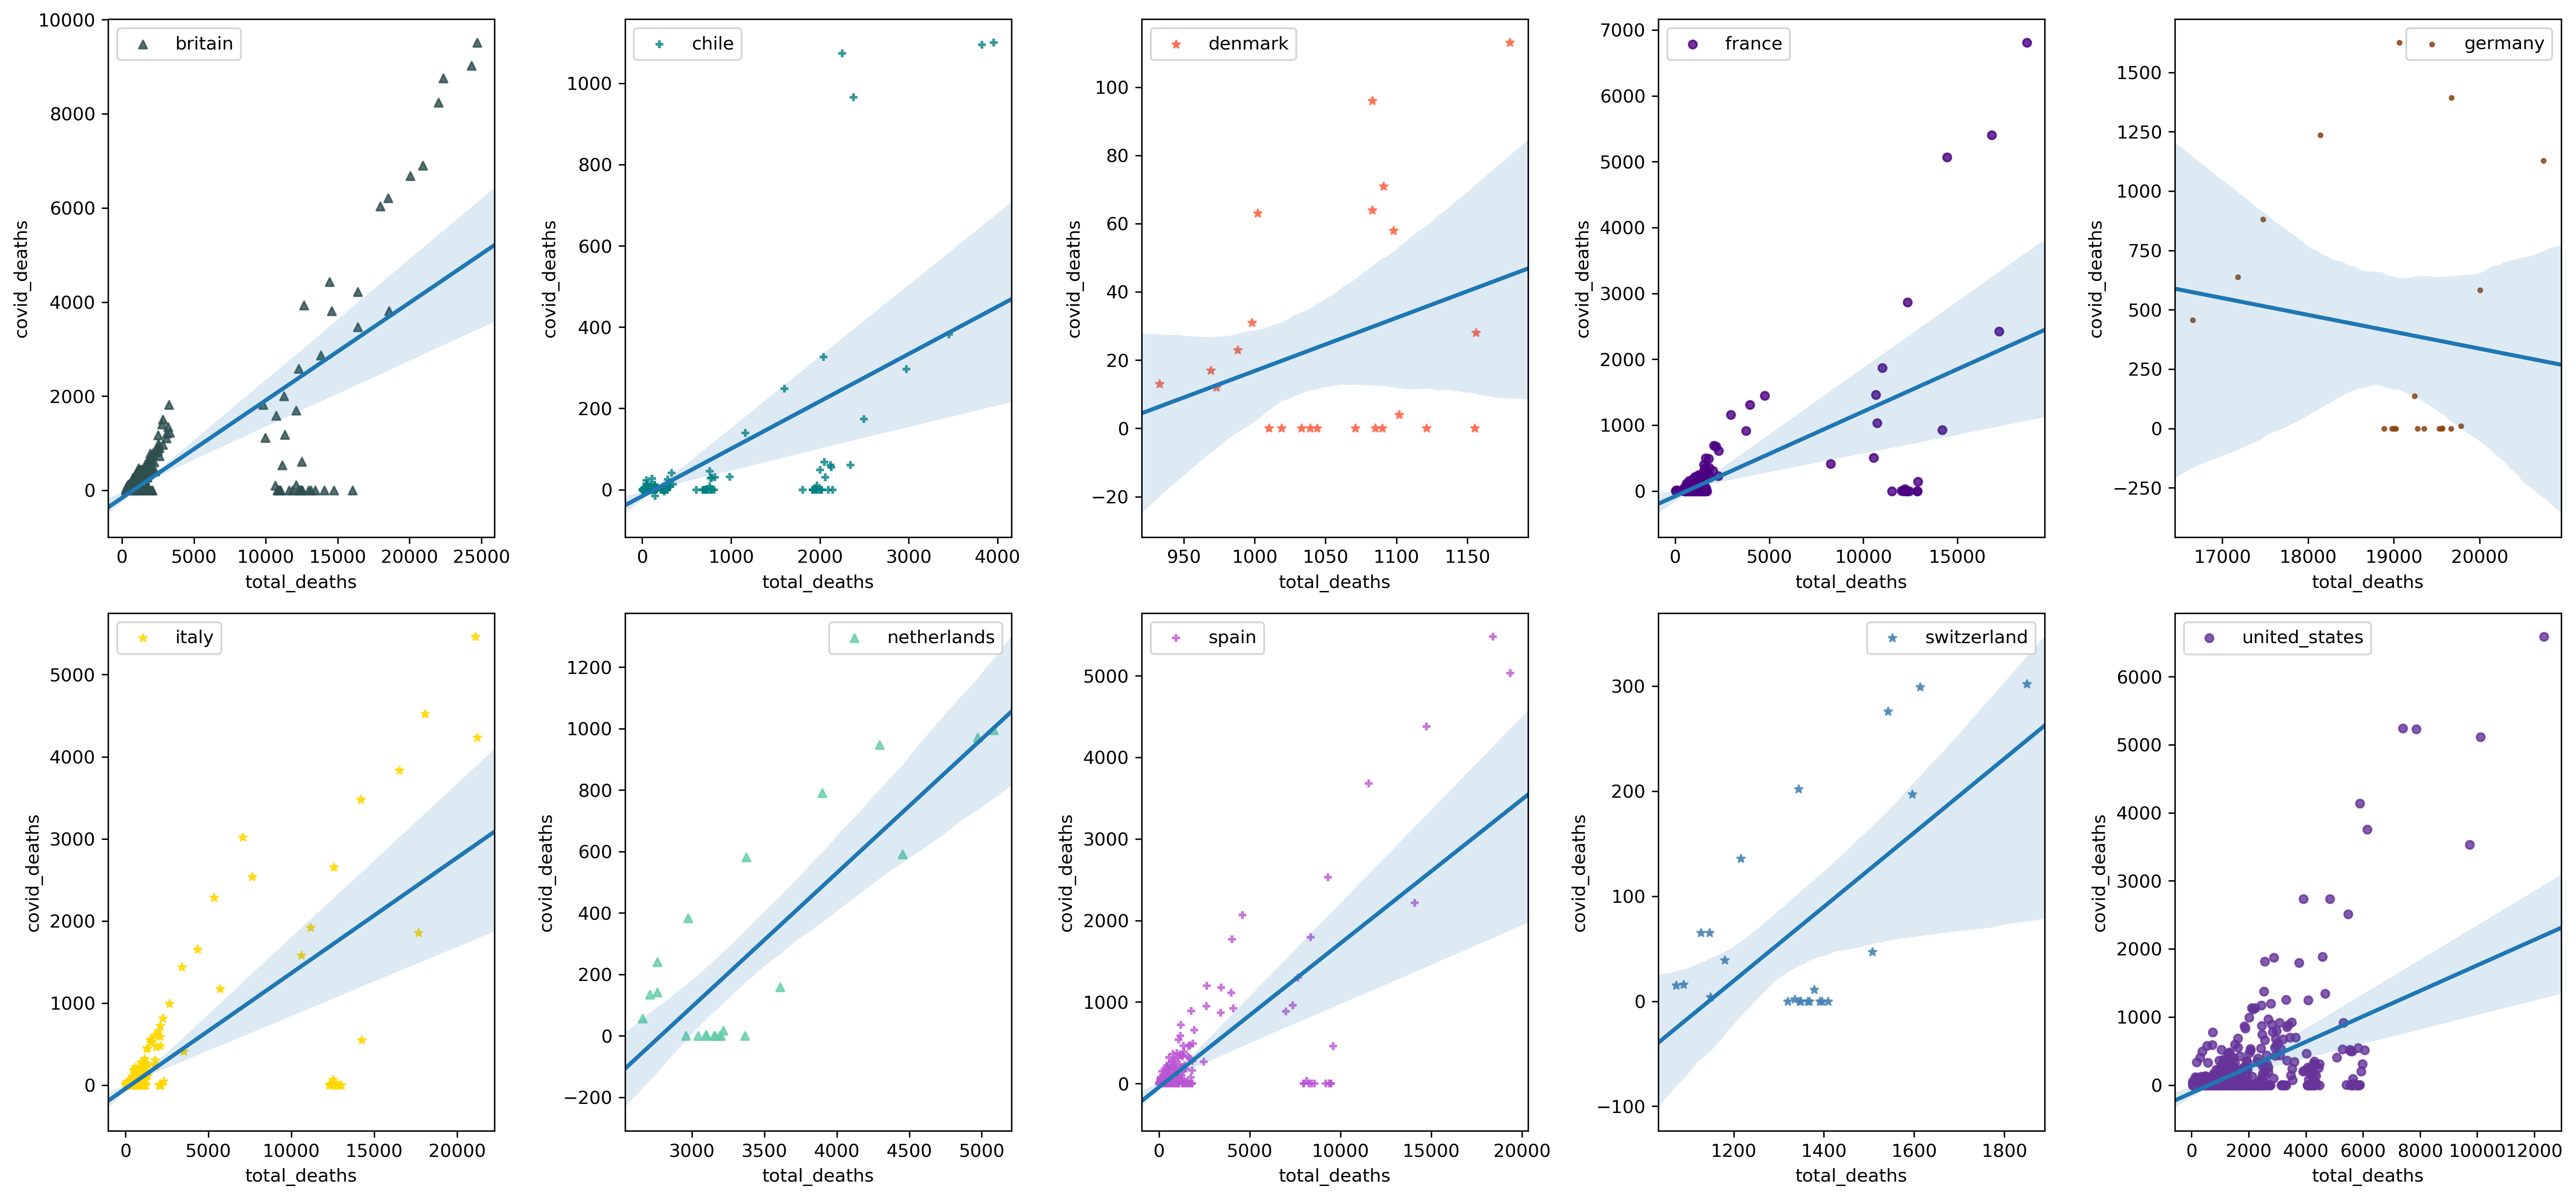

In [18]:
figure = plt.figure(figsize = (20,18), dpi = 300)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 'mediumaquamarine', 
          'mediumorchid', 'steelblue', 'rebeccapurple']
markers = ['^', '+', '*', 'o', '.', '*','^', '+', '*', 'o']
x = 1
for each in dict_data:
    plots = figure.add_subplot(4,5,x)
    plots = sns.regplot(dict_data[each]['total_deaths'], dict_data[each]['covid_deaths'], 
                        scatter_kws={"color": colors[x-1], 's':20}, marker = markers[x-1], fit_reg = True, label = each)
    x = x + 1;
    plt.legend()

figure.tight_layout()  

### Statistical descriptions of Excess deaths as its effecting Covid deaths

In [19]:
excess_Stats = pd.DataFrame()

for each in dict_data:
    print ("===== "+ each + " =====")
    print (dict_data[each]['excess_deaths'].describe())
    print()
    
    excess_Stats = pd.concat([excess_Stats, dict_data[each]['excess_deaths'].describe()], axis = 1)
excess_Stats.columns = ['britain', 'chile', 'denmark', 'france', 'germany', 'italy', 
                             'netherlands', 'spain', 'switzerland', 'united_states']

===== britain =====
count      322.000000
mean       532.558385
std       1780.164395
min      -1090.000000
25%        -45.800000
50%         32.700000
75%        394.100000
max      12731.400000
Name: excess_deaths, dtype: float64

===== chile =====
count     384.000000
mean       44.696615
std       191.102763
min       -86.600000
25%        -0.400000
50%         5.800000
75%        19.200000
max      1632.000000
Name: excess_deaths, dtype: float64

===== denmark =====
count     23.000000
mean     -21.730435
std       70.858158
min     -146.600000
25%      -59.300000
50%      -19.600000
75%       16.900000
max      118.200000
Name: excess_deaths, dtype: float64

===== france =====
count     308.000000
mean      120.646753
std       773.565630
min     -2075.000000
25%       -71.050000
50%        -3.900000
75%        78.250000
max      7406.200000
Name: excess_deaths, dtype: float64

===== germany =====
count      20.000000
mean     -203.912500
std      1226.927676
min     -2076.250000

In [20]:
excess_Stats

britain        chile     denmark       france      germany  \
25%      -45.800000    -0.400000  -59.300000   -71.050000  -801.625000   
50%       32.700000     5.800000  -19.600000    -3.900000  -388.625000   
75%      394.100000    19.200000   16.900000    78.250000   577.500000   
count    322.000000   384.000000   23.000000   308.000000    20.000000   
max    12731.400000  1632.000000  118.200000  7406.200000  2152.000000   
mean     532.558385    44.696615  -21.730435   120.646753  -203.912500   
min    -1090.000000   -86.600000 -146.600000 -2075.000000 -2076.250000   
std     1780.164395   191.102763   70.858158   773.565630  1226.927676   

             italy  netherlands         spain  switzerland  united_states  
25%     -47.550000  -150.950000    -13.625000  -110.400000      -9.050000  
50%      -7.000000   -13.300000      5.000000   -43.700000      19.800000  
75%      44.450000   595.950000     45.875000    83.900000      91.900000  
count   380.000000    22.000000    480.000000    23.000000    1188.000000  
max    9583.600000  2111.800000  11526.000000   563.200000    9250.000000  
mean    181.246316   347.754545    175.607292    21.339130     122.273064  
min   -1628.600000  -384.400000   -592.000000  -174.400000   -1168.400000  
std    1037.931670   763.614083    936.140776   193.717627     583.197790

### Statistical descriptions of Covid deaths

In [21]:
covid_Stats = pd.DataFrame()

for each in dict_data:
    print ("===== "+ each + " =====")
    print (dict_data[each]['covid_deaths'].describe())
    print()
    covid_Stats = pd.concat([covid_Stats, dict_data[each]['covid_deaths'].describe()], axis = 1)
covid_Stats.columns = ['britain', 'chile', 'denmark', 'france', 'germany', 'italy', 
                             'netherlands', 'spain', 'switzerland', 'united_states']

===== britain =====
count     322.000000
mean      479.093168
std      1333.219836
min         0.000000
25%         0.000000
50%        46.000000
75%       371.000000
max      9509.000000
Name: covid_deaths, dtype: float64

===== chile =====
count     384.000000
mean       17.619792
std       112.643601
min       -15.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      1100.000000
Name: covid_deaths, dtype: float64

===== denmark =====
count     23.000000
mean      25.782609
std       34.415848
min        0.000000
25%        0.000000
50%       12.000000
75%       44.500000
max      113.000000
Name: covid_deaths, dtype: float64

===== france =====
count     308.000000
mean      154.556528
std       639.235693
min         0.000000
25%         0.000000
50%         6.000000
75%        64.250000
max      6805.000000
Name: covid_deaths, dtype: float64

===== germany =====
count      20.000000
mean      404.500000
std       555.387821
min         0.000000
25%        

In [22]:
covid_Stats

britain        chile     denmark       france      germany  \
25%       0.000000     0.000000    0.000000     0.000000     0.000000   
50%      46.000000     0.000000   12.000000     6.000000     6.500000   
75%     371.000000     1.000000   44.500000    64.250000   698.750000   
count   322.000000   384.000000   23.000000   308.000000    20.000000   
max    9509.000000  1100.000000  113.000000  6805.000000  1625.000000   
mean    479.093168    17.619792   25.782609   154.556528   404.500000   
min       0.000000   -15.000000    0.000000     0.000000     0.000000   
std    1333.219836   112.643601   34.415848   639.235693   555.387821   

             italy  netherlands        spain  switzerland  united_states  
25%       0.000000     0.000000     0.000000     0.000000       0.000000  
50%       1.000000    95.500000     0.000000    15.000000       0.000000  
75%      47.500000   531.750000    41.250000   100.500000      48.250000  
count   380.000000    22.000000   420.000000    23.000000    1188.000000  
max    5462.000000   995.000000  5480.000000   302.000000    6588.000000  
mean    158.821053   273.318182   136.914286    72.869565     109.856902  
min       0.000000     0.000000     0.000000     0.000000     -10.000000  
std     599.219540   363.312981   531.129244   105.650067     441.394395

### Encoding covid_deaths 0 if no covid_deaths observed Else 1 if more than 1 covid_death found in data

In [23]:
def encode_covid_deaths(covid_deaths):
    if covid_deaths >= 1:
        return 1;
    else:
        return 0

In [24]:
for each in dict_data:
    dict_data[each]['encode_covid_deaths'] = dict_data[each]['covid_deaths'].apply(encode_covid_deaths)

### This opeation is useful for Naives Bayes classification to find posterior probability of covid deaths

In [25]:
for one in dict_data:
    print ("================================= " + one + "================================= ")
    print (dict_data[one].head())
    print("Frequency Count of Covid_Deaths 0's (if no covid deaths) and 1's (if more than one covid death observed)")
    print (dict_data[one]['encode_covid_deaths'].value_counts())
    print()


================================= britain================================= 
   country             region region_code  start_date    end_date  year  week  \
0  Britain  England and Wales   K04000001  2020-01-04  2020-01-10  2020     1   
1  Britain  England and Wales   K04000001  2020-01-11  2020-01-17  2020     2   
2  Britain  England and Wales   K04000001  2020-01-18  2020-01-24  2020     3   
3  Britain  England and Wales   K04000001  2020-01-25  2020-01-31  2020     4   
4  Britain  England and Wales   K04000001  2020-02-01  2020-02-07  2020     5   

   population  total_deaths  covid_deaths  expected_deaths  excess_deaths  \
0    59115809         14058             0          14131.2          -73.2   
1    59115809         12990             0          13218.6         -228.6   
2    59115809         11856             0          12791.8         -935.8   
3    59115809         11612             0          12256.8         -644.8   
4    59115809         10986             0          1

4              1067                    0  
Frequency Count of Covid_Deaths 0's (if no covid deaths) and 1's (if more than one covid death observed)
1    198
0    182
Name: encode_covid_deaths, dtype: int64

================================= netherlands================================= 
       country       region  region_code  start_date    end_date  year  week  \
0  Netherlands  Netherlands            0  2020-01-06  2020-01-12  2020     1   
1  Netherlands  Netherlands            0  2020-01-13  2020-01-19  2020     2   
2  Netherlands  Netherlands            0  2020-01-20  2020-01-26  2020     3   
3  Netherlands  Netherlands            0  2020-01-27  2020-02-02  2020     4   
4  Netherlands  Netherlands            0  2020-02-03  2020-02-09  2020     5   

   population  total_deaths  covid_deaths  expected_deaths  excess_deaths  \
0    17414806          3364             0           3355.0            9.0   
1    17414806          3153             0           3319.6         -166.6   
2

### Count Plot for counting encode_covid_deaths 0's and 1's

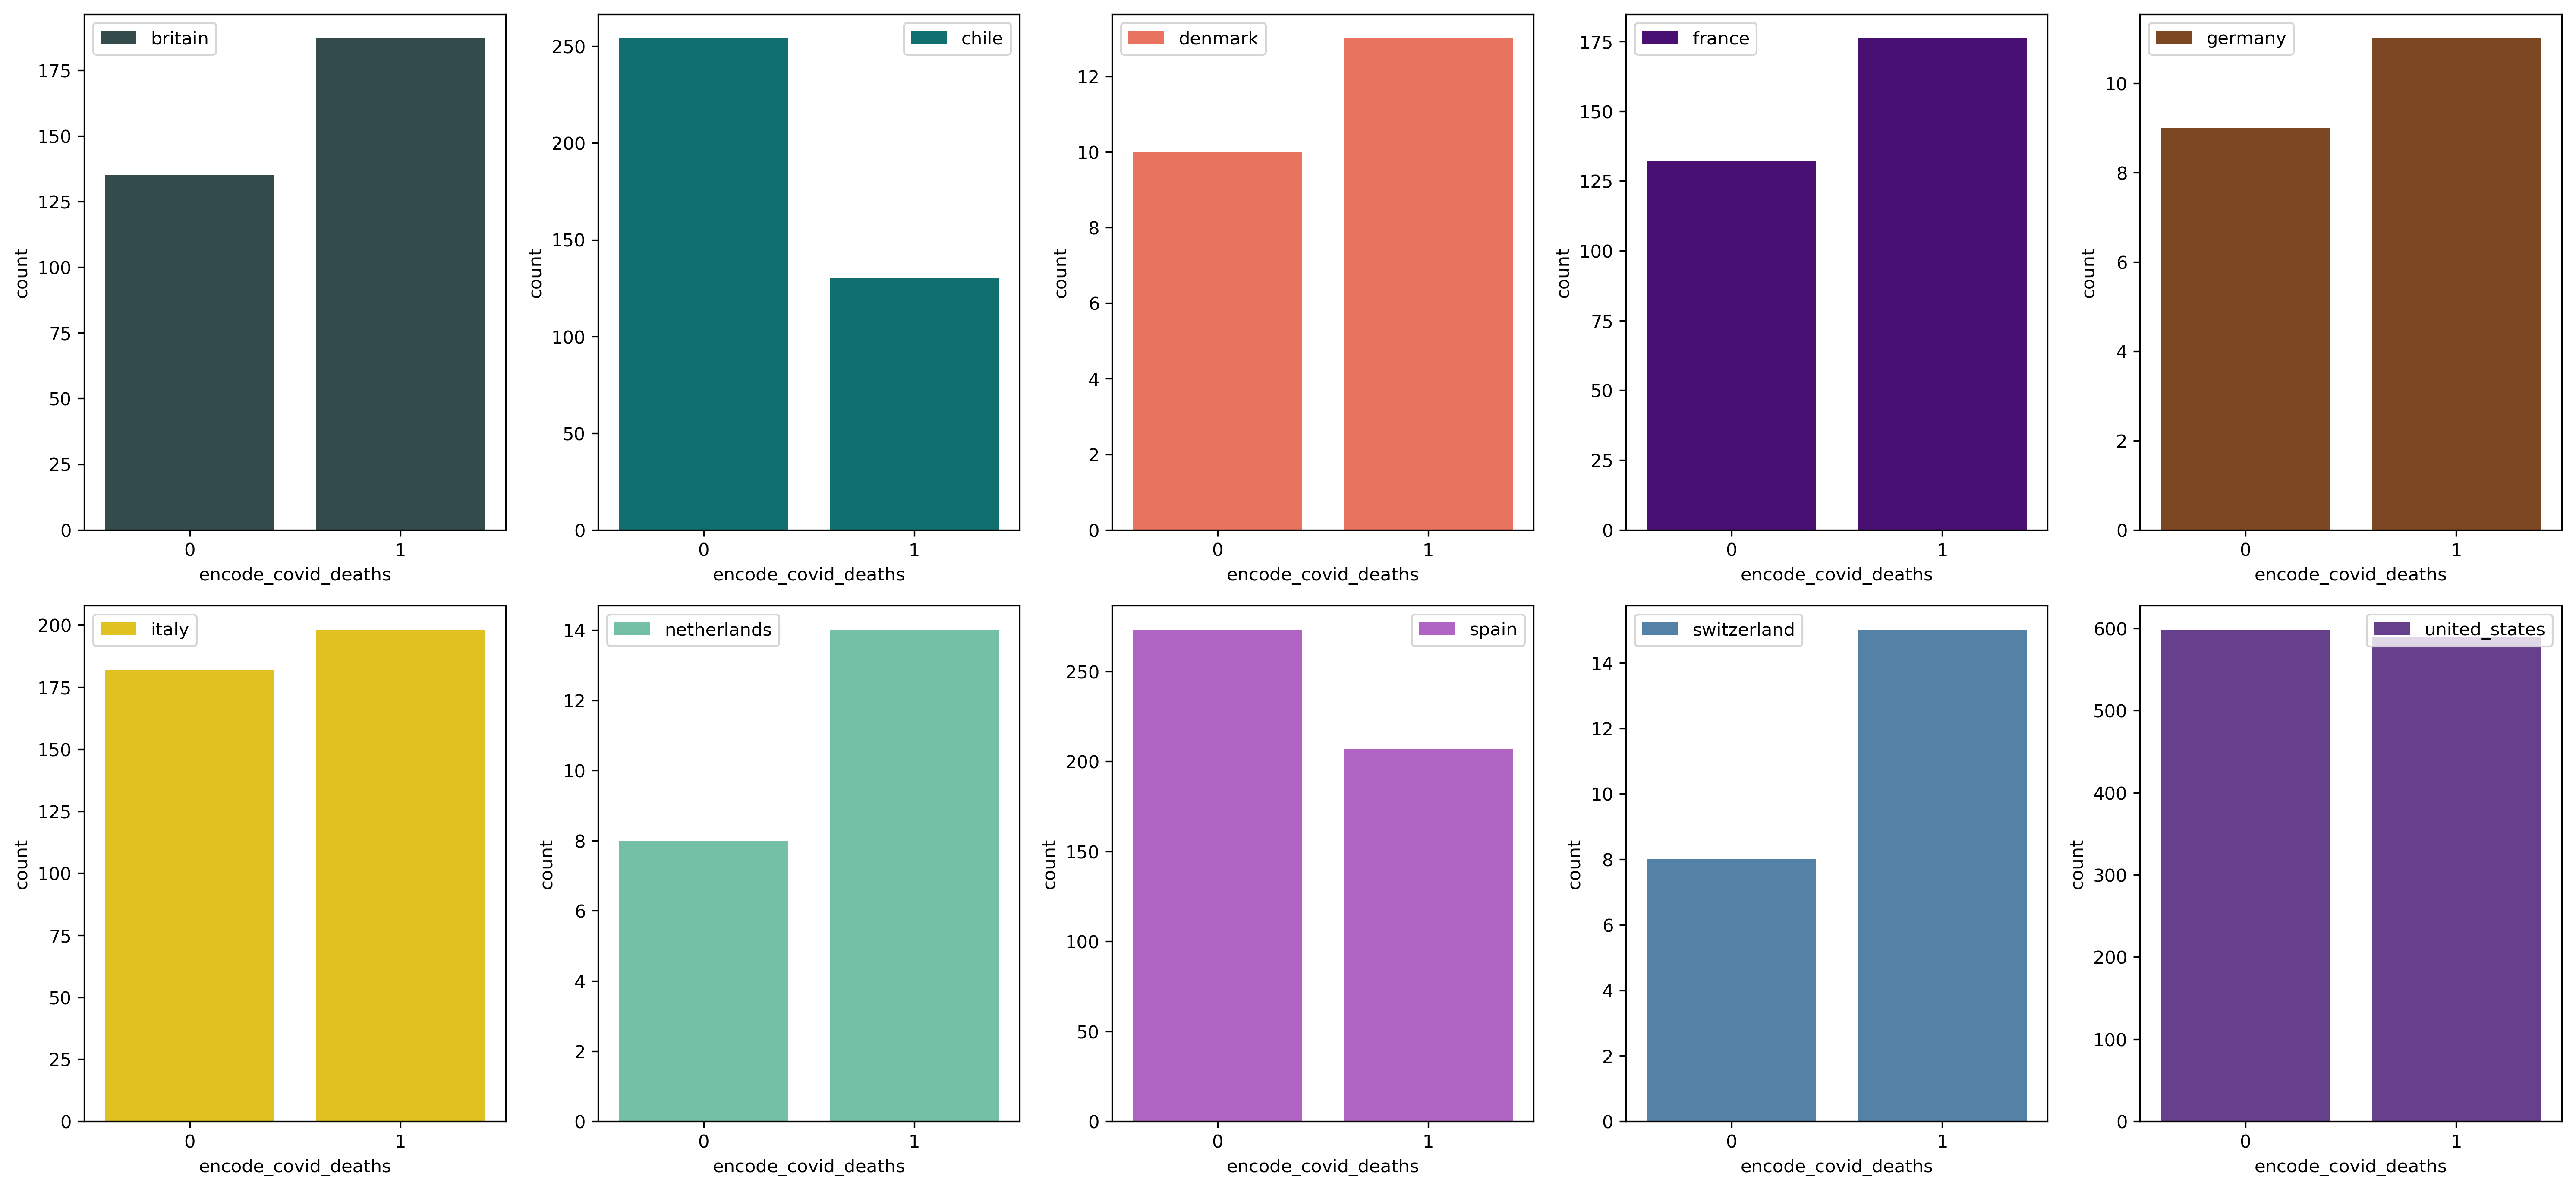

In [26]:
figure = plt.figure(figsize = (20,18), dpi = 300)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 'mediumaquamarine', 
          'mediumorchid', 'steelblue', 'rebeccapurple']
markers = ['^', '+', '*', 'o', '.', '*','^', '+', '*', 'o']
x = 1
for each in dict_data:
    plots = figure.add_subplot(4,5,x)
    plots = sns.countplot(dict_data[each]['encode_covid_deaths'], color = colors[x-1], label =each)
    x = x + 1;
    plt.legend()

figure.tight_layout()  

### Correlation Coefficient values of variables excess_deaths Vs covid_deaths

In [27]:
from scipy.stats import pearsonr

In [28]:
for each in dict_data:
    print ("================= " + each + "================= ")
    print (pearsonr(dict_data[each]['excess_deaths'], dict_data[each]['covid_deaths']))
    print()

================= britain================= 
(0.98257093955328, 6.5621710287271825e-236)

================= chile================= 
(0.9317164645631871, 4.080471676269951e-170)

================= denmark================= 
(0.7144983052980858, 0.00012804195883287672)

================= france================= 
(0.8634306145424269, 6.151825871505109e-93)

================= germany================= 
(0.8554785895008915, 1.5272334870171984e-06)

================= italy================= 
(0.9171349768790668, 4.403357889198977e-153)

================= netherlands================= 
(0.9560500137485133, 4.046372647965635e-12)

================= spain================= 
(nan, 1.0)

================= switzerland================= 
(0.9226353851115489, 3.784428144993279e-10)

================= united_states================= 
(0.9287468764017374, 0.0)



In [29]:
def replace_NaN(value):
    if pd.isnull(value):
        return 0;
    else:
        return value;

In [30]:
dict_data['spain']['covid_deaths'] = dict_data['spain']['covid_deaths'].apply(replace_NaN)
dict_data['spain']['non_covid_deaths'] = dict_data['spain']['non_covid_deaths'].apply(replace_NaN)

In [31]:
for each in dict_data:
    print ("================= " + each + "================= ")
    print (pearsonr(dict_data[each]['excess_deaths'], dict_data[each]['covid_deaths']))
    print()

================= britain================= 
(0.98257093955328, 6.5621710287271825e-236)

================= chile================= 
(0.9317164645631871, 4.080471676269951e-170)

================= denmark================= 
(0.7144983052980858, 0.00012804195883287672)

================= france================= 
(0.8634306145424269, 6.151825871505109e-93)

================= germany================= 
(0.8554785895008915, 1.5272334870171984e-06)

================= italy================= 
(0.9171349768790668, 4.403357889198977e-153)

================= netherlands================= 
(0.9560500137485133, 4.046372647965635e-12)

================= spain================= 
(0.939420512020171, 2.0818089634422633e-224)

================= switzerland================= 
(0.9226353851115489, 3.784428144993279e-10)

================= united_states================= 
(0.9287468764017374, 0.0)



### Coefficient of Determination (R-Squared values)

In [32]:
for each in dict_data:
    print ("=== " + each + "=== ")
    r, p = pearsonr(dict_data[each]['excess_deaths'], dict_data[each]['covid_deaths'])
    print(r ** 2)

=== britain=== 
0.9654456512546155
=== chile=== 
0.8680955703381248
=== denmark=== 
0.5105078282738366
=== france=== 
0.745512426129113
=== germany=== 
0.7318436170944348
=== italy=== 
0.8411365658149663
=== netherlands=== 
0.9140316287885324
=== spain=== 
0.8825108984042401
=== switzerland=== 
0.8512560538599361
=== united_states=== 
0.862570760425984


____________

### Importing ML modeling libraries

In [33]:
from sklearn import linear_model
import numpy as np
from scipy import stats
import statsmodels

### Modeling using *Statsmodels*

In [34]:
import statsmodels.formula.api as smf

model= smf.ols('covid_deaths ~ excess_deaths', data = dict_data['united_states'])
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:           covid_deaths   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     7444.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:37:52   Log-Likelihood:                -7741.2
No. Observations:                1188   AIC:                         1.549e+04
Df Residuals:                    1186   BIC:                         1.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.9082      4.853      4.927

### Finding Slopes and Intercepts for each country

In [35]:
linear_Slope_Intercept = pd.DataFrame()
from sklearn import metrics
for each in dict_data:
    model = linear_model.LinearRegression()
    results = model.fit(X = dict_data[each]['excess_deaths'].values.reshape(-1,1), y = dict_data[each]['covid_deaths'])
    linear_Slope_Intercept = linear_Slope_Intercept.append(pd.DataFrame({'slope': results.coef_, 
                                                                         'intercept': results.intercept_}, 
                                                                        index = [each]))

In [36]:
linear_Slope_Intercept

slope   intercept
britain        0.735878   87.195392
chile          0.549191   -6.927182
denmark        0.347032   33.323770
france         0.713496   68.475601
germany        0.387246  483.464226
italy          0.529481   62.854554
netherlands    0.454870  115.134961
spain          0.500563   31.897465
switzerland    0.503189   62.131959
united_states  0.702924   23.908243

### United States Covid death predictions

In [37]:
dict_data['united_states']['excess_deaths'].head()

0   -46.4
1   -15.6
2   -57.4
3   -35.6
4   -65.6
Name: excess_deaths, dtype: float64

In [38]:
results.predict(dict_data['united_states']['excess_deaths'].values.reshape(-1,1))

array([ -8.70742588,  12.9426303 , -16.43958879, ..., 455.92527312,
       350.62727265, 106.85326356])

### All countries Covid death predictions

In [39]:
predictions_Df = pd.DataFrame()

for each in list(dict_data.keys())[-1::-1]:
    model = linear_model.LinearRegression()
    results = model.fit(X = dict_data[each]['excess_deaths'].values.reshape(-1,1), y = dict_data[each]['covid_deaths'])
    temp = results.predict(dict_data[each]['excess_deaths'].values.reshape(-1,1))
    predictions_Df[each] = pd.Series(temp)


In [129]:
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### first 5 rows of predictions of each country

In [40]:
predictions_Df.head()

united_states  switzerland       spain  netherlands      italy     germany  \
0      -8.707426    -2.276175   25.890708   119.228794 -53.525391  391.202953   
1      12.942630    23.386441   40.657320    39.353566 -59.773268  449.773856   
2     -16.439589    19.260295  124.251362     3.327837 -31.287185  262.637401   
3      -1.115848    29.324066   84.456593    41.082073  -8.731290  239.596286   
4     -22.203565     7.284408  112.237847    62.642926   5.352907  244.630479   

      france    denmark     chile     britain  
0  -6.726834  38.598660 -4.510742   33.329153  
1 -36.979047  41.999576 -9.014108  -81.026223  
2  60.484451   8.129230 -1.105759 -601.438847  
3  23.525379  20.067139 -3.522199 -387.298472  
4   7.685777  14.792249 -6.927182 -587.604349

#### last 5 rows of predictions of each country

In [41]:
predictions_Df.tail()

united_states  switzerland  spain  netherlands  italy  germany  france  \
1183    1441.143414          NaN    NaN          NaN    NaN      NaN     NaN   
1184     899.610840          NaN    NaN          NaN    NaN      NaN     NaN   
1185     455.925273          NaN    NaN          NaN    NaN      NaN     NaN   
1186     350.627273          NaN    NaN          NaN    NaN      NaN     NaN   
1187     106.853264          NaN    NaN          NaN    NaN      NaN     NaN   

      denmark  chile  britain  
1183      NaN    NaN      NaN  
1184      NaN    NaN      NaN  
1185      NaN    NaN      NaN  
1186      NaN    NaN      NaN  
1187      NaN    NaN      NaN

#### size of the predictions_Df DataFrame

In [42]:
predictions_Df.shape

(1188, 10)

#### Actual dataset sizes

In [43]:
for each in dict_data:
    print (dict_data[each].shape)

(322, 14)
(384, 14)
(23, 14)
(308, 14)
(20, 14)
(380, 14)
(22, 14)
(480, 14)
(23, 14)
(1188, 14)


    Each country dataset size is different in comparison to other countries. So, "NaN" (missing) values present in the predictions_Df dataset represents no data available. 

In [44]:
predictions_Df.head()

united_states  switzerland       spain  netherlands      italy     germany  \
0      -8.707426    -2.276175   25.890708   119.228794 -53.525391  391.202953   
1      12.942630    23.386441   40.657320    39.353566 -59.773268  449.773856   
2     -16.439589    19.260295  124.251362     3.327837 -31.287185  262.637401   
3      -1.115848    29.324066   84.456593    41.082073  -8.731290  239.596286   
4     -22.203565     7.284408  112.237847    62.642926   5.352907  244.630479   

      france    denmark     chile     britain  
0  -6.726834  38.598660 -4.510742   33.329153  
1 -36.979047  41.999576 -9.014108  -81.026223  
2  60.484451   8.129230 -1.105759 -601.438847  
3  23.525379  20.067139 -3.522199 -387.298472  
4   7.685777  14.792249 -6.927182 -587.604349

In [45]:
linear_Slope_Intercept

slope   intercept
britain        0.735878   87.195392
chile          0.549191   -6.927182
denmark        0.347032   33.323770
france         0.713496   68.475601
germany        0.387246  483.464226
italy          0.529481   62.854554
netherlands    0.454870  115.134961
spain          0.500563   31.897465
switzerland    0.503189   62.131959
united_states  0.702924   23.908243

In [46]:
dict_data['united_states']['excess_deaths'].head()

0   -46.4
1   -15.6
2   -57.4
3   -35.6
4   -65.6
Name: excess_deaths, dtype: float64

### Interpretation

    Interpretation is simple. For example in United States, using straight-line equation,
    
$$\large y \space = \space b_1x \space + \space b_0$$

$$ y \space = \space 0.702924 \space * \space x \space + \space 23.908243$$

    To interpret these numbers we say that for every one unit increase in Excess_deaths (i.e. every time the excess_deaths increases by a 1 number), the covid_deaths increases by 0.702924

### Residual Plots to check If data is randomly spread over 0

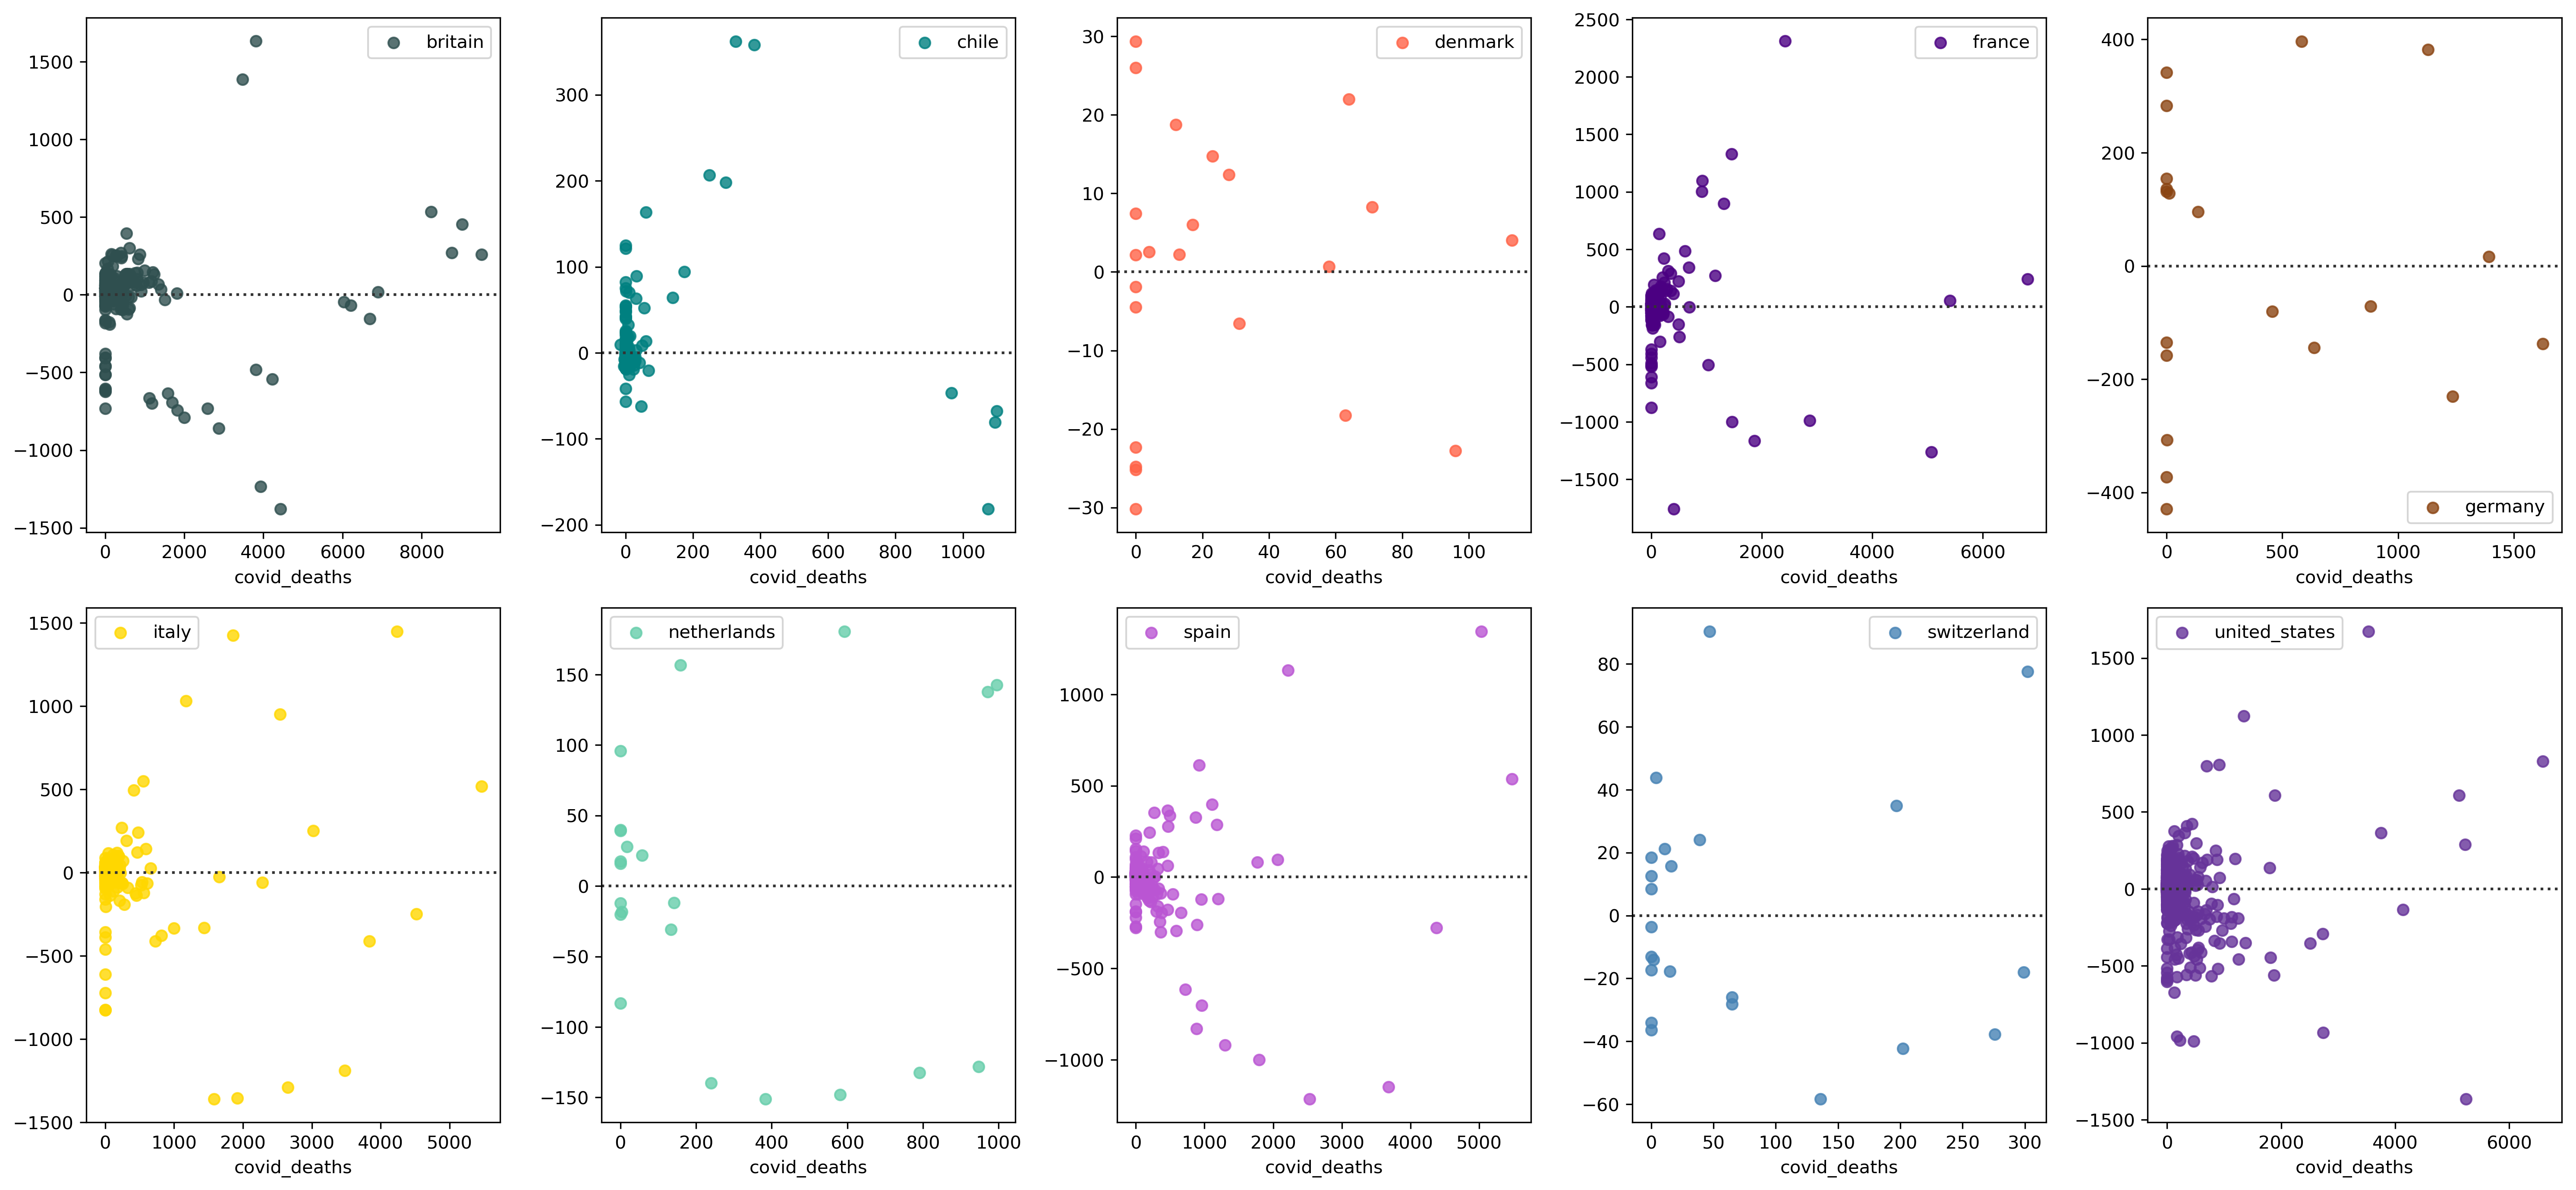

In [47]:
figure = plt.figure(figsize = (20,18), dpi = 300)

colors = ['darkslategray', 'teal', 'tomato', 'indigo', 'saddlebrown', 'gold', 'mediumaquamarine', 
          'mediumorchid', 'steelblue', 'rebeccapurple']
markers = ['^', '+', '*', 'o', '.', '*','^', '+', '*', 'o']
x = 1
for each in dict_data:
    model = linear_model.LinearRegression()
    results = model.fit(X = dict_data[each]['excess_deaths'].values.reshape(-1,1), y = dict_data[each]['covid_deaths'])
    plots = figure.add_subplot(4,5,x)
    plots = sns.residplot(dict_data[each]['covid_deaths'], results.predict(dict_data[each]['excess_deaths'].values.reshape(-1,1)), color = colors[x-1], label = each)
    x = x + 1;
    plt.legend()

figure.tight_layout()

### Covid rates detection in each country

In [48]:
covid_rates = pd.DataFrame()

for each, one, index in zip(linear_Slope_Intercept['slope'], linear_Slope_Intercept['intercept'], linear_Slope_Intercept.index):
    test_0 = (each * 0) + one;
    test_1 = (each * 1) + one;
    diff = test_1 - test_0;
    covid_rates = pd.concat([covid_rates, pd.DataFrame({index : diff}, index = [0])], axis = 1)

In [49]:
covid_rates

britain     chile   denmark    france   germany     italy  netherlands  \
0  0.735878  0.549191  0.347032  0.713496  0.387246  0.529481      0.45487   

      spain  switzerland  united_states  
0  0.500563     0.503189       0.702924

    On observation, the countries Britain, France and United States has high covid death rate comparing to other countries.

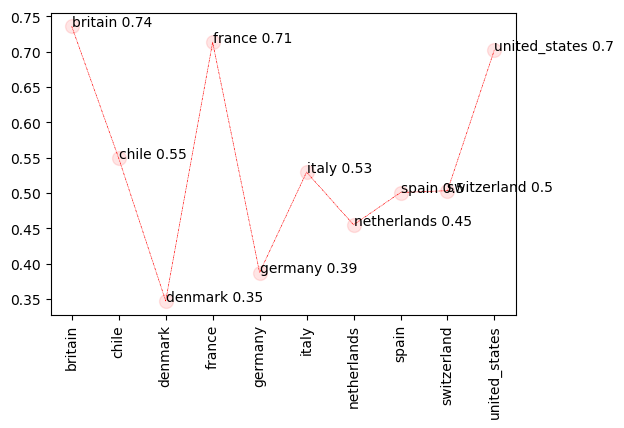

In [50]:
fig = plt.figure(figsize = (6,4), dpi = 100)
ax = fig.add_subplot(111)
plt.plot(covid_rates.loc[0], linestyle = (0, (3, 1, 1, 1, 1, 1)),
         linewidth=0.5, marker = 'o', color='red', 
         markersize=10, markerfacecolor=(1, 0, 0, 0.1))
ax.set_xticklabels(list(covid_rates.columns), rotation=90 )

for i,j in zip (covid_rates.columns, covid_rates.loc[0]):
    ax.annotate('%s' %(i+' '+str(round(j, 2))) , xy=(i, j))
ax.set_facecolor('xkcd:white')

### Lasso and Ridge Regression

In [51]:
from sklearn.linear_model import Ridge, Lasso
import scipy.stats as stats

In [52]:
lasso_df = pd.DataFrame()

for each in dict_data:
    lasso_reg = Lasso(alpha = 0.5, normalize = True, random_state = 42).fit(dict_data[each]['excess_deaths'].values.reshape(-1,1), 
                                                               dict_data[each]['covid_deaths'])
    ridge_reg = Ridge(alpha = 0.5, normalize = True, random_state = 42).fit(dict_data[each]['excess_deaths'].values.reshape(-1,1), 
                                                               dict_data[each]['covid_deaths'])
    
    lasso_df = lasso_df.append(pd.DataFrame({'lasso_coef_': lasso_reg.coef_, 'lasso_int': lasso_reg.intercept_, 
                                            'ridge_coef_': ridge_reg.coef_, 'ridge_int': ridge_reg.intercept_},
                                            index = [each]))


In [53]:
lasso_df

lasso_coef_   lasso_int  ridge_coef_   ridge_int
britain           0.730830   89.883709     0.490585  217.827984
chile             0.497853   -4.632569     0.366127    1.255142
denmark           0.312431   32.571861     0.231355   30.810050
france            0.702134   69.846388     0.475664   97.169244
germany           0.385376  483.082942     0.258164  457.142817
italy             0.520078   64.558809     0.352987   94.843387
netherlands       0.451727  116.228117     0.303247  167.862701
spain             0.488849   33.954515     0.333709   61.198310
switzerland       0.490532   62.402040     0.335459   65.711161
united_states     0.673361   27.522974     0.468616   52.557796

In [54]:
linear_Slope_Intercept.columns = ['linear_coef', 'linear_intercept_']

In [55]:
lr_lasso = pd.concat([linear_Slope_Intercept, lasso_df], axis = 1)

In [56]:
lr_lasso

linear_coef  linear_intercept_  lasso_coef_   lasso_int  \
britain           0.735878          87.195392     0.730830   89.883709   
chile             0.549191          -6.927182     0.497853   -4.632569   
denmark           0.347032          33.323770     0.312431   32.571861   
france            0.713496          68.475601     0.702134   69.846388   
germany           0.387246         483.464226     0.385376  483.082942   
italy             0.529481          62.854554     0.520078   64.558809   
netherlands       0.454870         115.134961     0.451727  116.228117   
spain             0.500563          31.897465     0.488849   33.954515   
switzerland       0.503189          62.131959     0.490532   62.402040   
united_states     0.702924          23.908243     0.673361   27.522974   

               ridge_coef_   ridge_int  
britain           0.490585  217.827984  
chile             0.366127    1.255142  
denmark           0.231355   30.810050  
france            0.475664   97.169244  
germany           0.258164  457.142817  
italy             0.352987   94.843387  
netherlands       0.303247  167.862701  
spain             0.333709   61.198310  
switzerland       0.335459   65.711161  
united_states     0.468616   52.557796

## SVM Classification

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [58]:
svc_Report = pd.DataFrame()

for each in dict_data:
    X_features = ['region','total_deaths', 'covid_deaths', 'expected_deaths', 
                  'excess_deaths', 'non_covid_deaths', 'encode_covid_deaths']
    encoded_each_df = pd.get_dummies(dict_data[each][X_features], drop_first = True)
    
    Y = dict_data[each].encode_covid_deaths
    X = encoded_each_df
    
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)
    
    nbc = SVC()
    nbc.fit(X_train,y_train)
    
    y_pred = nbc.predict(X_test)
    
    print("The classification report is as follows...\n")
    print(classification_report(y_pred,y_test))
  
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
    grid.fit(X_train,y_train)
    print ("a", grid.best_params_)
    print ("b", grid.best_estimator_)
    
    grid_predictions = grid.predict(X_test)
    print(confusion_matrix(y_test,grid_predictions))
    
    print(classification_report(y_test,grid_predictions))
    auc = metrics.roc_auc_score(y_test, grid_predictions)
    c_0, c_1 = metrics.f1_score(y_test, grid_predictions, average = None)
    svc_Report = svc_Report.append(pd.DataFrame({'AUC_Score' : auc, 'f1_Score_0': c_0, 'f1_Score_1': c_1}, index = [each]))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.58      0.73        97

   micro avg       0.58      0.58      0.58        97
   macro avg       0.50      0.29      0.37        97
weighted avg       1.00      0.58      0.73        97

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
b SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[21 20]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.88      0.51      0.65        41
           1       0.73      0.95      0.82        56

   micro avg       0.76      0.76      0.76        97
   macro avg       0.80      0.73      0.73        97
weighted avg       0.79      0.76      0.75        97

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       109
           1       0.08      0.43      0.13         7

   micro avg       0.66      0.66      0.66       116
   macro avg       0.51      0.55      0.46       116
weighted avg       0.90      0.66      0.75       116

Fitting 3 fol

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
b SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[78  0]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        78
           1       1.00      0.84      0.91        38

   micro avg       0.95      0.95      0.95       116
   macro avg       0.96      0.92      0.94       116
weighted avg       0.95      0.95      0.95       116

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.43      0.60         7

   micro avg       0.43      0.43      0.43         7
   macro avg       0.50      0.21      0.30         7
weighted avg       1.00      0.43      0.60         7

Fitting

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
b SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[2 2]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3

   micro avg       0.71      0.71      0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.02      1.00      0.05         1
           1       1.00      0.54      0.70        92

   micro avg       0.55      0.55      0.55        93
   macro avg       0.51      0.77      0.37        93
weighted avg       0.99      0.55      0.70        93

Fitting 3 fol

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
b SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[33 10]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        43
           1       0.80      0.82      0.81        50

   micro avg       0.80      0.80      0.80        93
   macro avg       0.79      0.79      0.79        93
weighted avg       0.80      0.80      0.80        93

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         6

   micro avg       0.33      0.33      0.33         6
   macro avg       0.50      0.17      0.25         6
weighted avg       1.00      0.33      0.50         6

Fitting

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
b SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[0 4]
 [0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

   micro avg       0.33      0.33      0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.17      0.90      0.28        10
           1       0.98      0.57      0.72       104

   micro avg       0.60      0.60      0.60       114
   macro avg       0.57      0.73      0.50       114
weighted avg       0.91      0.60      0.68       114

Fitting 3 folds for eac

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
b SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[47  7]
 [ 7 53]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.88      0.88      0.88        60

   micro avg       0.88      0.88      0.88       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.88      0.88      0.88       114

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.57      0.73         7

   micro avg       0.57      0.57      0.57         7
   macro avg       0.50      0.29      0.36         7
weighted avg       1.00      0.57      0.73         7

Fitting 3

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
b SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[0 3]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4

   micro avg       0.57      0.57      0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7

The classification report is as follows...

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       141
           1       0.04      1.00      0.08         3

   micro avg       0.55      0.55      0.55       144
   macro avg       0.52      0.77      0.39       144
weighted avg       0.98      0.55      0.69       144

Fitting 3 folds for eac

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
b SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[65 11]
 [10 58]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        76
           1       0.84      0.85      0.85        68

   micro avg       0.85      0.85      0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.71      0.83         7

   micro avg       0.71      0.71      0.71         7
   macro avg       0.50      0.36      0.42         7
weighted avg       1.00      0.71      0.83         7

Fitting 3 f

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


a {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
b SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[2 0]
 [2 3]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

   micro avg       0.71      0.71      0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.34      0.85      0.49        71
           1       0.94      0.60      0.73       286

   micro avg       0.65      0.65      0.65       357
   macro avg       0.64      0.72      0.61       357
weighted avg       0.82      0.65      0.69       357

Fitting 3 folds f

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.5s finished


In [59]:
svc_Report

AUC_Score  f1_Score_0  f1_Score_1
britain         0.729312    0.646154    0.821705
chile           0.921053    0.962963    0.914286
denmark         0.750000    0.666667    0.750000
france          0.793721    0.776471    0.811881
germany         0.500000    0.000000    0.500000
italy           0.876852    0.870370    0.883333
netherlands     0.500000    0.000000    0.727273
spain           0.854102    0.860927    0.846715
switzerland     0.800000    0.666667    0.750000
united_states   0.897211    0.897507    0.895184

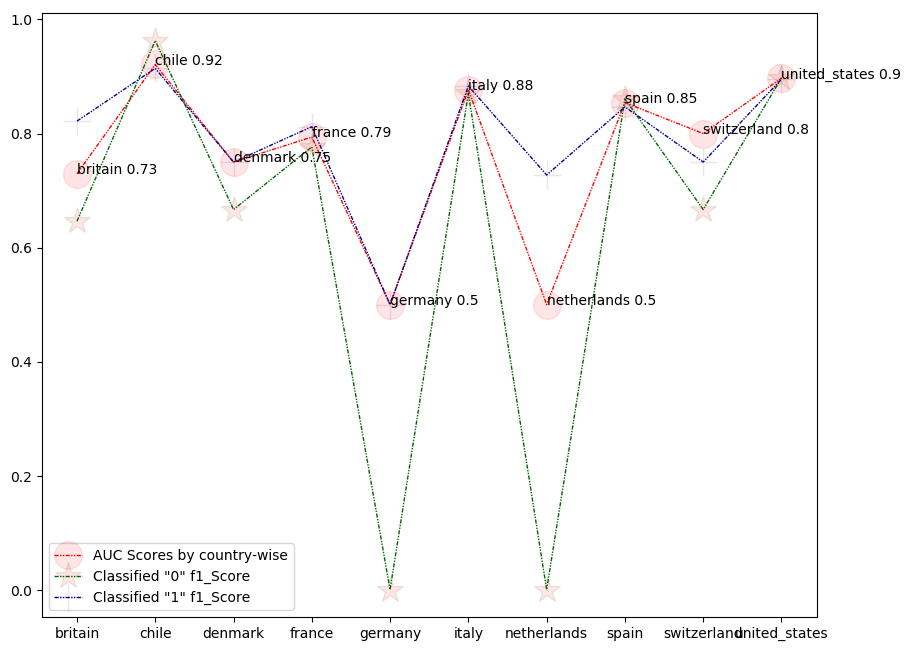

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8), dpi = 100)
axs = fig.add_subplot(111)

plt.plot(svc_Report.AUC_Score, label = 'AUC Scores by country-wise', linestyle = (0, (3, 1, 1, 1, 1, 1)),
         linewidth=1, marker = 'o', color='red', 
         markersize=20, markerfacecolor=(1, 0, 0, 0.1))

plt.plot(svc_Report.f1_Score_0, label = 'Classified "0" f1_Score', linestyle = (0, (3, 1, 1, 1, 1, 1)),
         linewidth=1, marker = '*', color='darkgreen', 
         markersize=20, markerfacecolor=(1, 0, 0, 0.1))

plt.plot(svc_Report.f1_Score_1, label = 'Classified "1" f1_Score', linestyle = (0, (3, 1, 1, 1, 1, 1)),
         linewidth=1, marker = '+', color='darkblue', 
         markersize=20, markerfacecolor=(1, 0, 0, 0.1))

for i,j in zip (svc_Report.index, svc_Report.AUC_Score):
    axs.annotate('%s' %(i+' '+str(round(j, 2))) , xy=(i, j))
axs.set_facecolor('xkcd:white')
plt.legend()

In [61]:
united_states.head()

country   region region_code  start_date    end_date  year  week  \
0  United States  Alabama          AL  2019-12-29  2020-01-04  2020     1   
1  United States  Alabama          AL  2020-01-05  2020-01-11  2020     2   
2  United States  Alabama          AL  2020-01-12  2020-01-18  2020     3   
3  United States  Alabama          AL  2020-01-19  2020-01-25  2020     4   
4  United States  Alabama          AL  2020-01-26  2020-02-01  2020     5   

   population  total_deaths  covid_deaths  expected_deaths  excess_deaths  \
0     4903185          1093             0           1139.4          -46.4   
1     4903185          1148             0           1163.6          -15.6   
2     4903185          1073             0           1130.4          -57.4   
3     4903185          1082             0           1117.6          -35.6   
4     4903185          1052             0           1117.6          -65.6   

   non_covid_deaths  encode_covid_deaths  
0              1093                    0  
1              1148                    0  
2              1073                    0  
3              1082                    0  
4              1052                    0

### Implementation of Vanilla Regression

In [62]:
final_Df = pd.DataFrame()
for each in dict_data:
    x = np.array(dict_data[each]['excess_deaths'])
    y = np.array(dict_data[each]['covid_deaths'])
    
    x_Avg = sum(x) / float(len(x))
    y_Avg = sum(y) / float(len(y))
    
    x_Diff = [ xi - x_Avg for xi in x ] 
    y_Diff = [ yi - y_Avg for yi in y ]
    
    xy = [ x_Diff[i] * y_Diff[i] for i in range(len(x)) ]
    xx = [ x_Diff[i] * x_Diff[i] for i in range(len(x)) ]
    
    slope = sum(xy) / sum(xx)
    intercept_ = y_Avg - slope * x_Avg
    final_Df = pd.concat([final_Df, pd.DataFrame({'vanilla_Slope': slope, 'vanilla_Intercept': intercept_}, index = [each])], axis = 0)


final_Df = pd.concat([lr_lasso, final_Df], axis = 1)
 

In [63]:
final_Df

linear_coef  linear_intercept_  lasso_coef_   lasso_int  \
britain           0.735878          87.195392     0.730830   89.883709   
chile             0.549191          -6.927182     0.497853   -4.632569   
denmark           0.347032          33.323770     0.312431   32.571861   
france            0.713496          68.475601     0.702134   69.846388   
germany           0.387246         483.464226     0.385376  483.082942   
italy             0.529481          62.854554     0.520078   64.558809   
netherlands       0.454870         115.134961     0.451727  116.228117   
spain             0.500563          31.897465     0.488849   33.954515   
switzerland       0.503189          62.131959     0.490532   62.402040   
united_states     0.702924          23.908243     0.673361   27.522974   

               ridge_coef_   ridge_int  vanilla_Slope  vanilla_Intercept  
britain           0.490585  217.827984       0.735878          87.195392  
chile             0.366127    1.255142       0.549191          -6.927182  
denmark           0.231355   30.810050       0.347032          33.323770  
france            0.475664   97.169244       0.713496          68.475601  
germany           0.258164  457.142817       0.387246         483.464226  
italy             0.352987   94.843387       0.529481          62.854554  
netherlands       0.303247  167.862701       0.454870         115.134961  
spain             0.333709   61.198310       0.500563          31.897465  
switzerland       0.335459   65.711161       0.503189          62.131959  
united_states     0.468616   52.557796       0.702924          23.908243

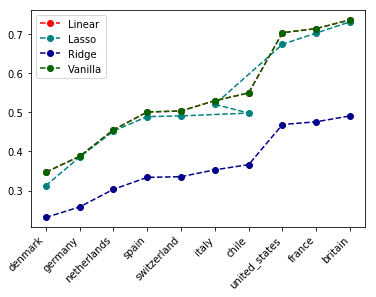

In [64]:
plt.plot(final_Df['linear_coef'].sort_values(), linestyle = '--',marker = 'o', color = 'red', label = 'Linear')
plt.plot(final_Df['lasso_coef_'].sort_values(), linestyle = '--',marker = 'o', color = 'teal', label = 'Lasso')
plt.plot(final_Df['ridge_coef_'].sort_values(),linestyle = '--',marker = 'o', color = 'darkblue', label = 'Ridge')
plt.plot(final_Df['vanilla_Slope'].sort_values(),linestyle = '--',marker = 'o', color = 'darkgreen', label = 'Vanilla')
plt.xticks(rotation=45, ha='right')
plt.legend()

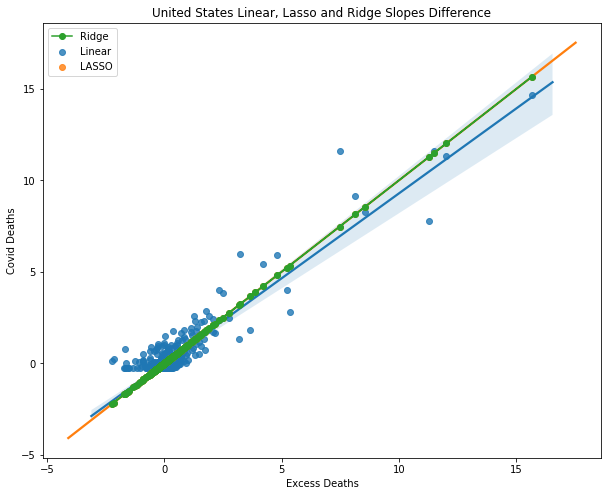

In [235]:
x = stats.zscore(united_states['excess_deaths'])
x1 = united_states['excess_deaths']
y = stats.zscore(united_states['covid_deaths'])
y1 = final_Df[final_Df.index == 'united_states']['linear_coef'][0]*x1 + final_Df[final_Df.index == 'united_states']['linear_intercept_'][0]
y2 = final_Df[final_Df.index == 'united_states']['lasso_coef_'][0]*x1 + final_Df[final_Df.index == 'united_states']['lasso_int'][0]
y3 = final_Df[final_Df.index == 'united_states']['ridge_coef_'][0]*x1 + final_Df[final_Df.index == 'united_states']['ridge_int'][0]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
sns.regplot(x, y, label = 'Linear', marker = 'o')
sns.regplot(x, stats.zscore(y2), label = 'LASSO', marker = 'o')
plt.plot(x, stats.zscore(y3),label = 'Ridge', marker = 'o')
plt.legend()
ax.set_xlabel("Excess Deaths")
ax.set_ylabel("Covid Deaths")

ax.set_title("United States Linear, Lasso and Ridge Slopes Difference")
plt.show()

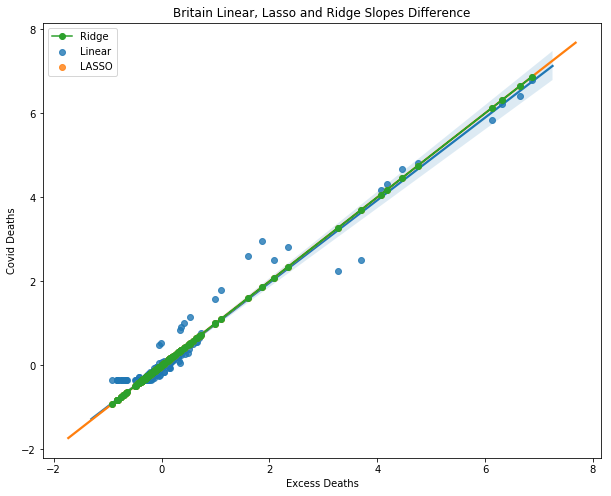

In [236]:
x = stats.zscore(britain['excess_deaths'])
x1 = britain['excess_deaths']
y = stats.zscore(britain['covid_deaths'])
y1 = final_Df[final_Df.index == 'britain']['linear_coef'][0]*x1 + final_Df[final_Df.index == 'britain']['linear_intercept_'][0]
y2 = final_Df[final_Df.index == 'britain']['lasso_coef_'][0]*x1 + final_Df[final_Df.index == 'britain']['lasso_int'][0]
y3 = final_Df[final_Df.index == 'britain']['ridge_coef_'][0]*x1 + final_Df[final_Df.index == 'britain']['ridge_int'][0]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)

sns.regplot(x, y, label = 'Linear', marker = 'o')
sns.regplot(x, stats.zscore(y2), label = 'LASSO', marker = 'o')
plt.plot(x, stats.zscore(y3),label = 'Ridge', marker = 'o')
ax.set_xlabel("Excess Deaths")
ax.set_ylabel("Covid Deaths")

ax.set_title("Britain Linear, Lasso and Ridge Slopes Difference")
plt.legend()
plt.show()

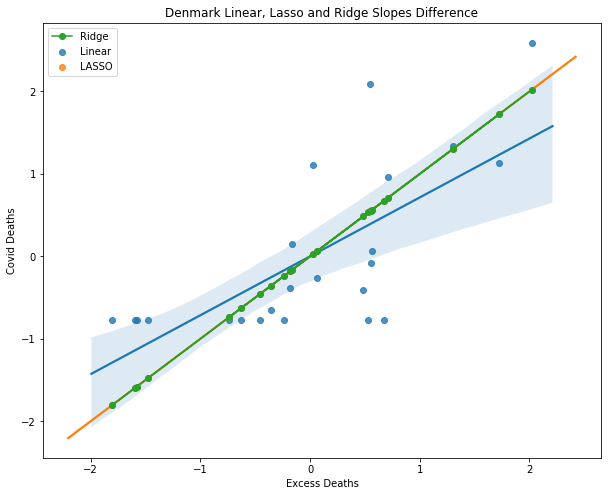

In [237]:
x = stats.zscore(denmark['excess_deaths'])
x1 = denmark['excess_deaths']
y = stats.zscore(denmark['covid_deaths'])
y1 = final_Df[final_Df.index == 'denmark']['linear_coef'][0]*x1 + final_Df[final_Df.index == 'denmark']['linear_intercept_'][0]
y2 = final_Df[final_Df.index == 'denmark']['lasso_coef_'][0]*x1 + final_Df[final_Df.index == 'denmark']['lasso_int'][0]
y3 = final_Df[final_Df.index == 'denmark']['ridge_coef_'][0]*x1 + final_Df[final_Df.index == 'denmark']['ridge_int'][0]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
sns.regplot(x, y, label = 'Linear', marker = 'o')
sns.regplot(x, stats.zscore(y2), label = 'LASSO', marker = 'o')
plt.plot(x, stats.zscore(y3),label = 'Ridge', marker = 'o')
ax.set_xlabel("Excess Deaths")
ax.set_ylabel("Covid Deaths")

ax.set_title("Denmark Linear, Lasso and Ridge Slopes Difference")
plt.legend()
plt.show()

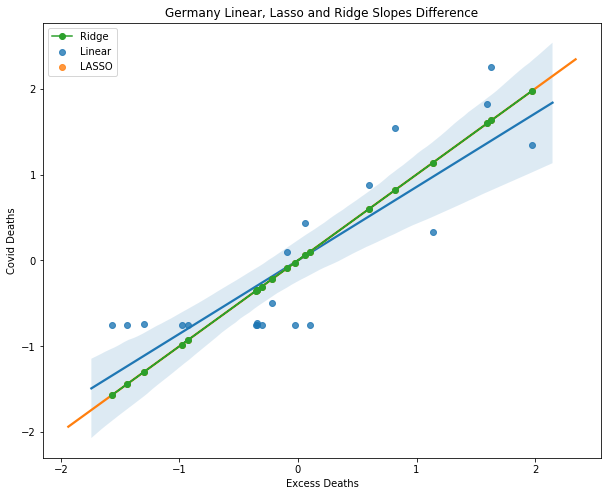

In [238]:
x = stats.zscore(germany['excess_deaths'])
x1 = germany['excess_deaths']
y = stats.zscore(germany['covid_deaths'])
y1 = final_Df[final_Df.index == 'germany']['linear_coef'][0]*x1 + final_Df[final_Df.index == 'germany']['linear_intercept_'][0]
y2 = final_Df[final_Df.index == 'germany']['lasso_coef_'][0]*x1 + final_Df[final_Df.index == 'germany']['lasso_int'][0]
y3 = final_Df[final_Df.index == 'germany']['ridge_coef_'][0]*x1 + final_Df[final_Df.index == 'germany']['ridge_int'][0]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)

sns.regplot(x, y, label = 'Linear', marker = 'o')
sns.regplot(x, stats.zscore(y2), label = 'LASSO', marker = 'o')
plt.plot(x, stats.zscore(y3),label = 'Ridge', marker = 'o')
ax.set_xlabel("Excess Deaths")
ax.set_ylabel("Covid Deaths")

ax.set_title("Germany Linear, Lasso and Ridge Slopes Difference")
plt.legend()
plt.show()